# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

Se proponen dos objetivos: 
1. Predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.
2. Predecir el volúmen de precipitaciones (columna *Rainfall* del dia siguiente), en función al *Rainfall* del dia actual


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. Todos los puntos analizarlos para los dos problemas planteados.
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor
- ancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Para cada uno de los problemas propuestos, defina una lista de modelos candidatos a entrenar. Justifique sus elecciones. 

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
pd.set_option("display.max_columns", None)

# sklearn
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
# Partición de train-test set
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures

import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


### 1. Análisis exploratorio inicial

In [2]:
weather_aus_df = pd.read_csv('data/weatherAUS.csv', parse_dates=['Date'])
weather_aus_df.shape

(145460, 23)

In [3]:
weather_aus_df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
weather_aus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [5]:
weather_aus_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


This dataset contains about 10 years of daily weather observations from many locations across Australia.

Date: The date of observation
Location: The common name of the location of the weather station
RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
WindDir3pm: Direction of the wind at 3pm
WindDir9am: Direction of the wind at 9am
WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight

MinTemp: The minimum temperature in degrees celsius
MaxTemp: The maximum temperature in degrees celsius
Rainfall: The amount of rainfall recorded for the day in mm
Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine: The number of hours of bright sunshine in the day.
WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3am
Humidity9am: Humidity (percent) at 9am
Humidity3pm: Humidity (percent) at 3pm
Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast
Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
Temp9am: Temperature (degrees C) at 9am
Temp3pm: Temperature (degrees C) at 3pm

RainTomorrow: The target variable. Did it rain tomorrow? (1 = yes, 0 = no )


#### Variables numéricas

In [13]:
print('Columnas con variables numéricas')
numeric_df = weather_aus_df.select_dtypes(exclude=['category', object]).columns
numeric_df.values


Columnas con variables numéricas


array(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], dtype=object)

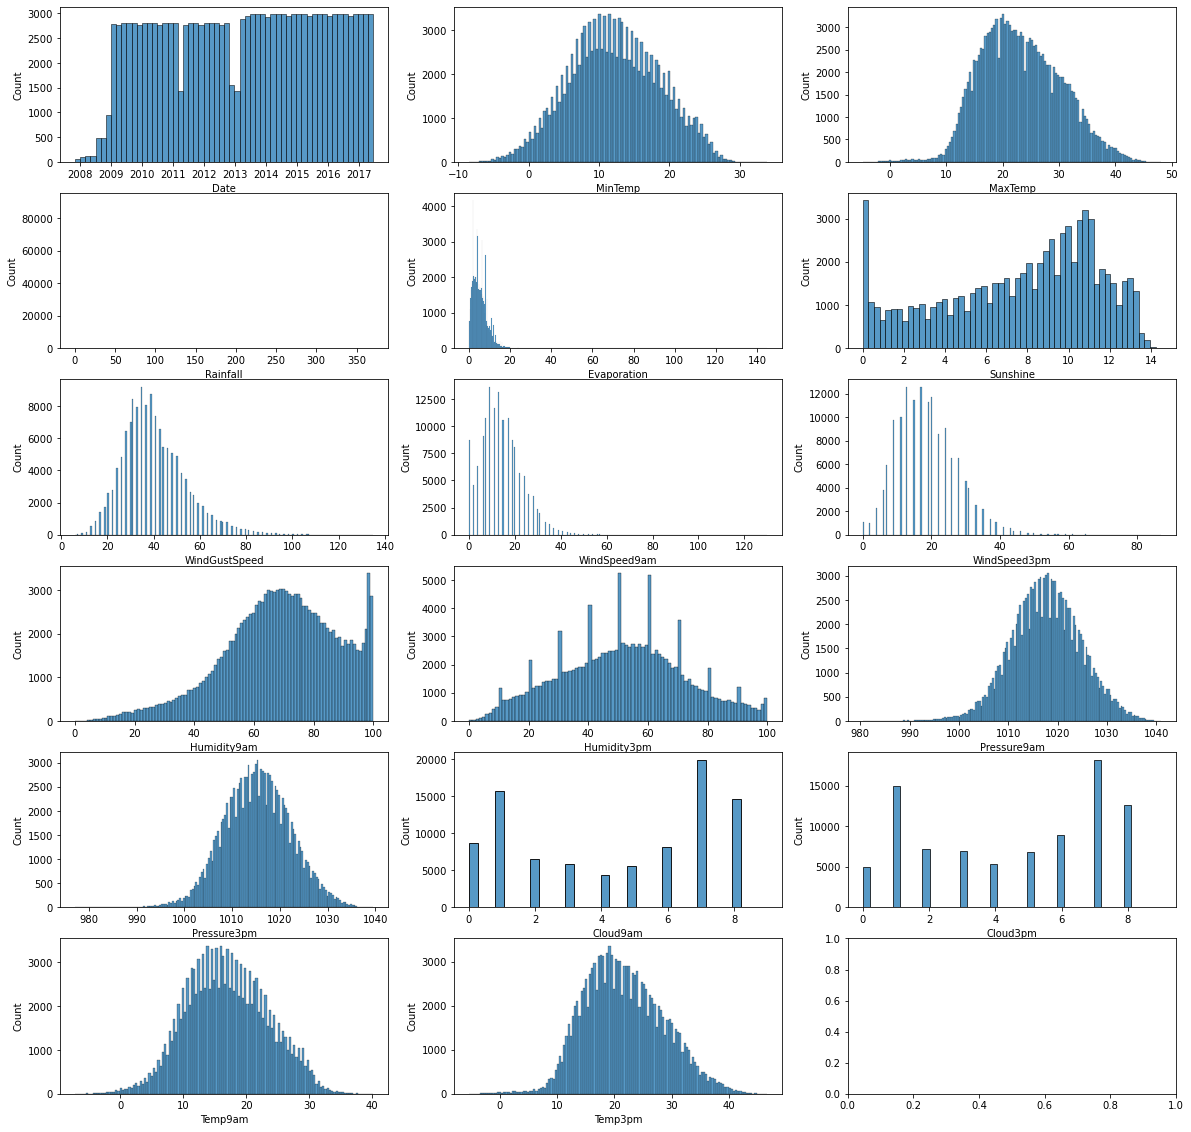

In [14]:
def distributionPlots(df, numeric_columns):
    fig, axes =plt.subplots(6,3, figsize=(20,20))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(numeric_columns):
            sns.histplot(data = df, x = numeric_columns[i], ax=ax)
            i+=1

distributionPlots(weather_aus_df, numeric_df.values)

* Date es una variables compuesta (year-month-day), proponemos descomponerlo.
* Temp9m, Temp3pm, MinTemp, MaxTemp se asemejan a una normal
* WindGustSpeed, WindSpeed9am y WindSpeed3pm son v.a continuas pero no tiene suficientes muestras para completar su distribución.
* Rainfall, Evaporation y sunshine tienen otra forma de distribución diferente a una normal o no tienen suficientes muestras.
* Humidity9am y Humidity3pm tienen oblicuidad.
* Pressure9am y Pressure3pm también se asemejan a una distribución normal.
* Cloud3pm y Cloud9am son v.a discretas medidas en ‘Octa’, https://es.wikipedia.org/wiki/Octa

#### Variables categóricas

In [11]:
print('Columnas con variables categóricas')
categorical_df = weather_aus_df.select_dtypes(include=['category', object]).columns
categorical_df.values

Columnas con variables categóricas


array(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

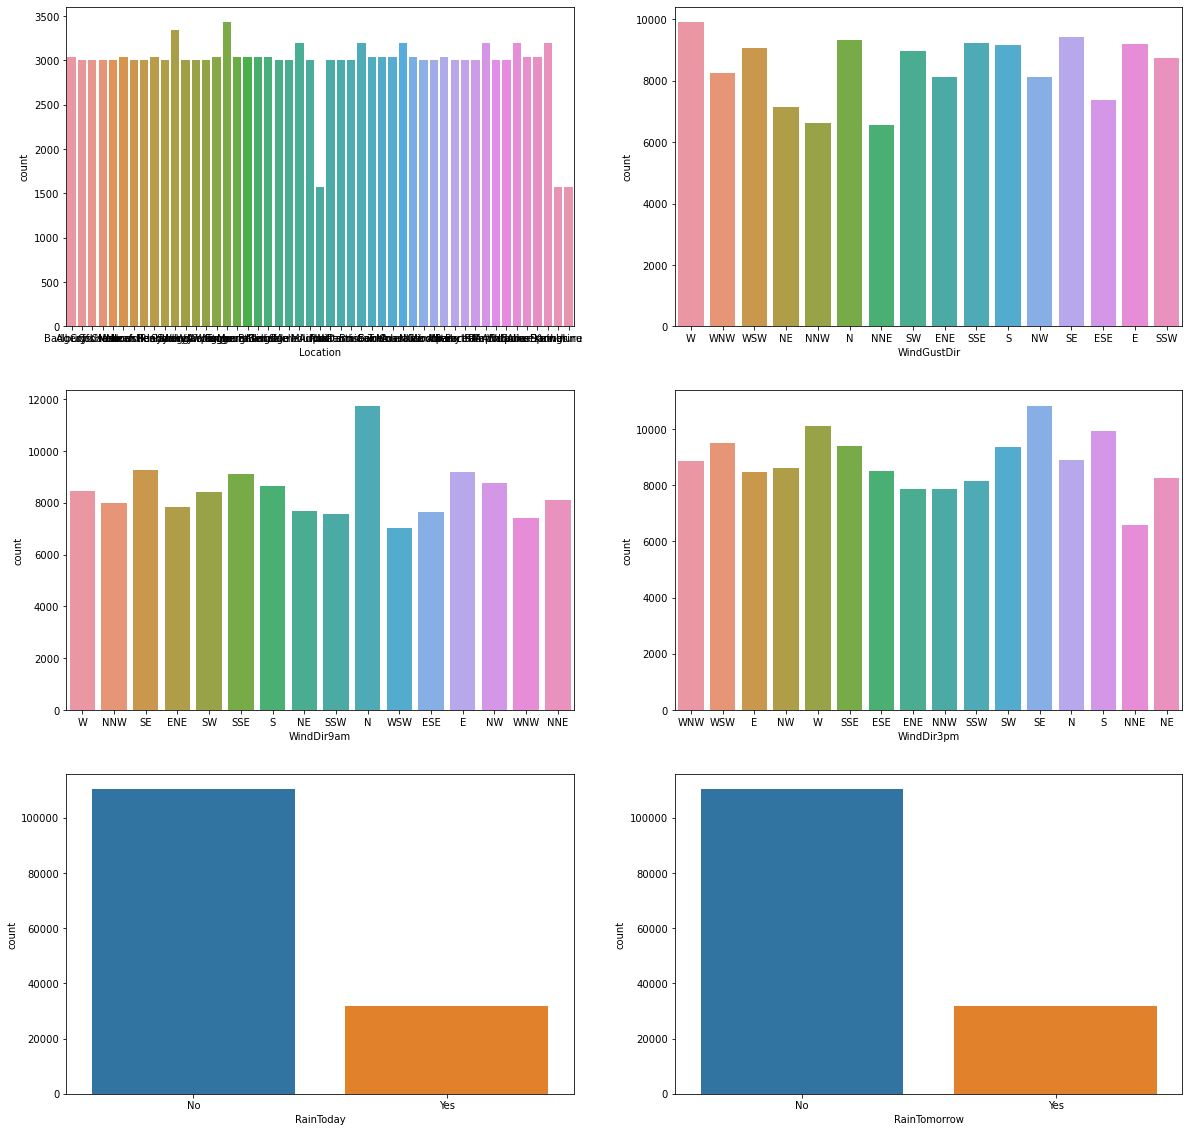

In [12]:
def countPlots(df, column_names):
    fig, axes =plt.subplots(3,2, figsize=(20,20))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(column_names):
            sns.countplot(x = column_names[i],
                   data = df, ax=ax)
            i+=1

countPlots(weather_aus_df, categorical_df.values)

* Location,  WindGustDir, WinDir9am y WinDir3pm está bastante bien balanceadas.
* WindGustDir, WinDir9am y WinDir3pm tienen las mismas unidades/labels
* RainToday y RainTomorrow solo tienen 2 etiquetas ('Yes' o 'No')

#### Valores unicos/cardinalidad

In [10]:
for i in categorical_df.values:
    print(i, weather_aus_df[i].unique(), len(weather_aus_df[i].unique()))

Location ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'] 49
WindGustDir ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW'] 17
WindDir9am ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE'] 17
WindDir3pm ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE'] 17
RainToday ['No' 'Yes' nan] 3
RainTomorrow ['No' 'Yes' nan] 3


* La variable 'Location' posee mayor cardinalidad (49), vamos a proponer Label encoding o dummy encoding (genera mas dimensiones)
* Las variables 'WindGustDir', 'WindDir9am' y 'WindDir3pm' se puede usar una transformacion de sin y cosine o Label encoding
* Las variables RainToday y RainTomorrow se encuentran desbalanceadas, existen más muestras de cuando no llueve. Usaremos dummy encoding.

#### Variable de salida

In [11]:
weather_aus_df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

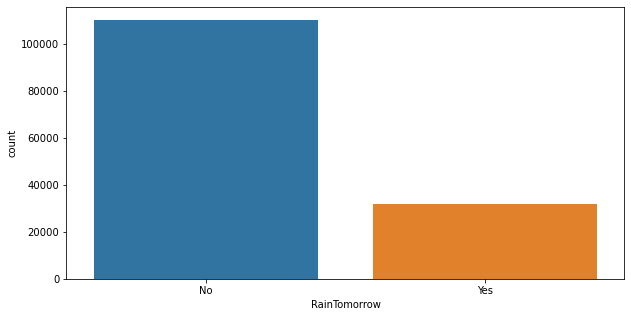

In [12]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x ='RainTomorrow' ,
                   data = weather_aus_df, ax=axes)

¿Qué técnicas consideraría para codificar la variable de salida?
Como trabajaremos con una clasificación binaria entonces la forma de codificar la variable de salida es simple, usamos 1 para Yes y 0 para No (dummy encoding).

¿Están balanceadas las clases?
Las clases de la variable de salida están desbalanceadas, buscaremos que la proporcion se mantenga en Train,Validation y Test

### 2. Esquema de validación de resultados
tomamos un 20% de los datos para test.

In [15]:
train_ratio = 0.80
test_ratio = 0.20

X_train, X_test, y_train, y_test = train_test_split(weather_aus_df.drop(columns=['RainTomorrow']), weather_aus_df['RainTomorrow'], test_size=test_ratio)
print("Train: ", X_train.shape,y_train.shape)
print("Test:", X_test.shape,y_test.shape)

Train:  (116368, 22) (116368,)
Test: (29092, 22) (29092,)


#### Revisar que las distribuciones en train y test que sean parecidas

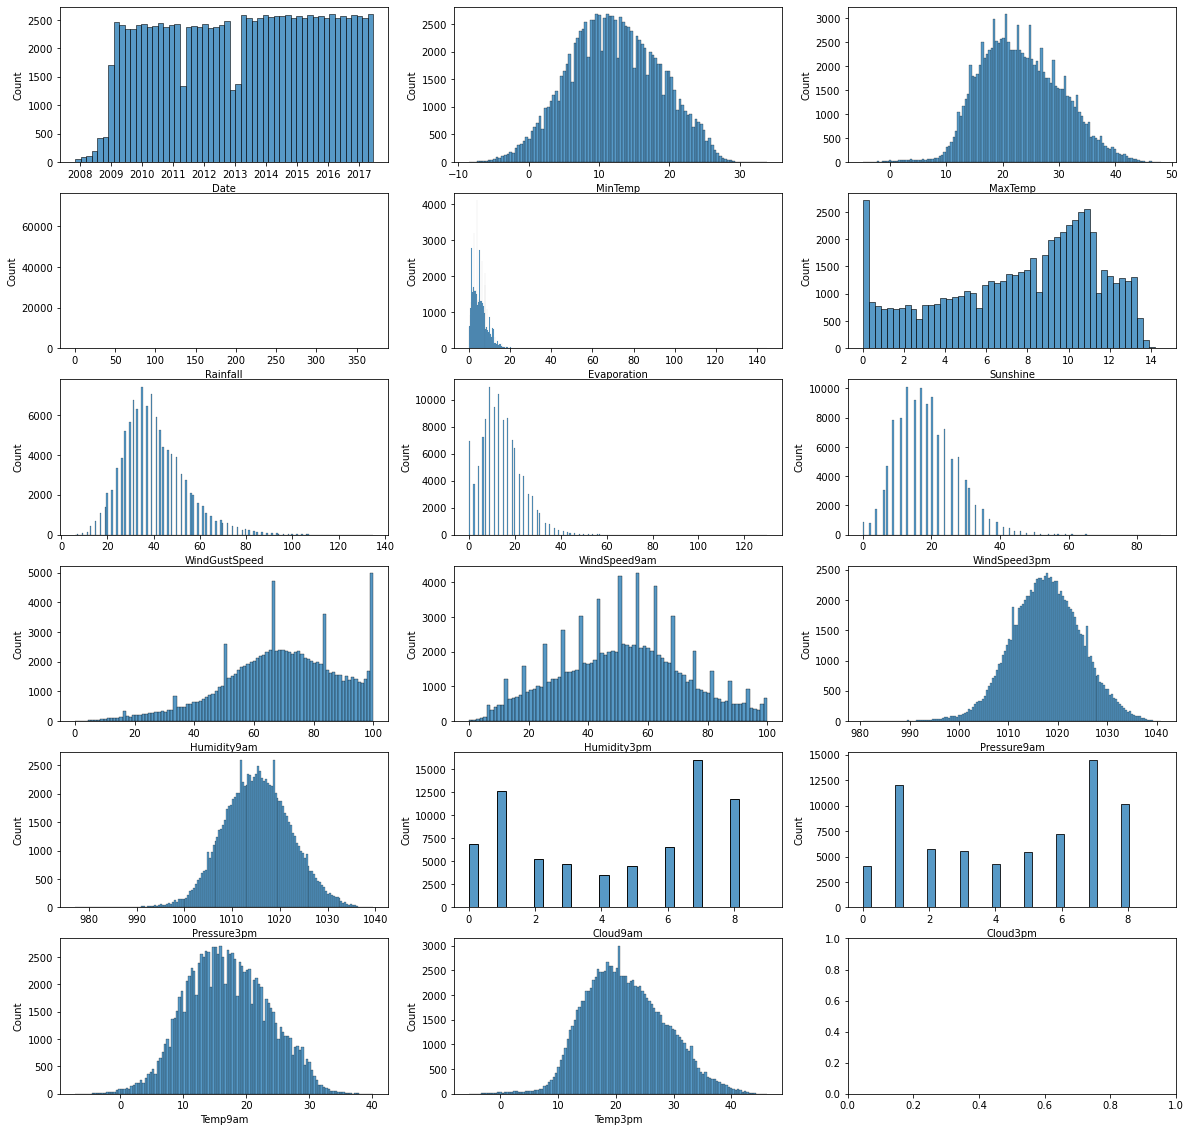

In [16]:
distributionPlots(X_train, X_train.select_dtypes(exclude=['category', object]).columns.values)

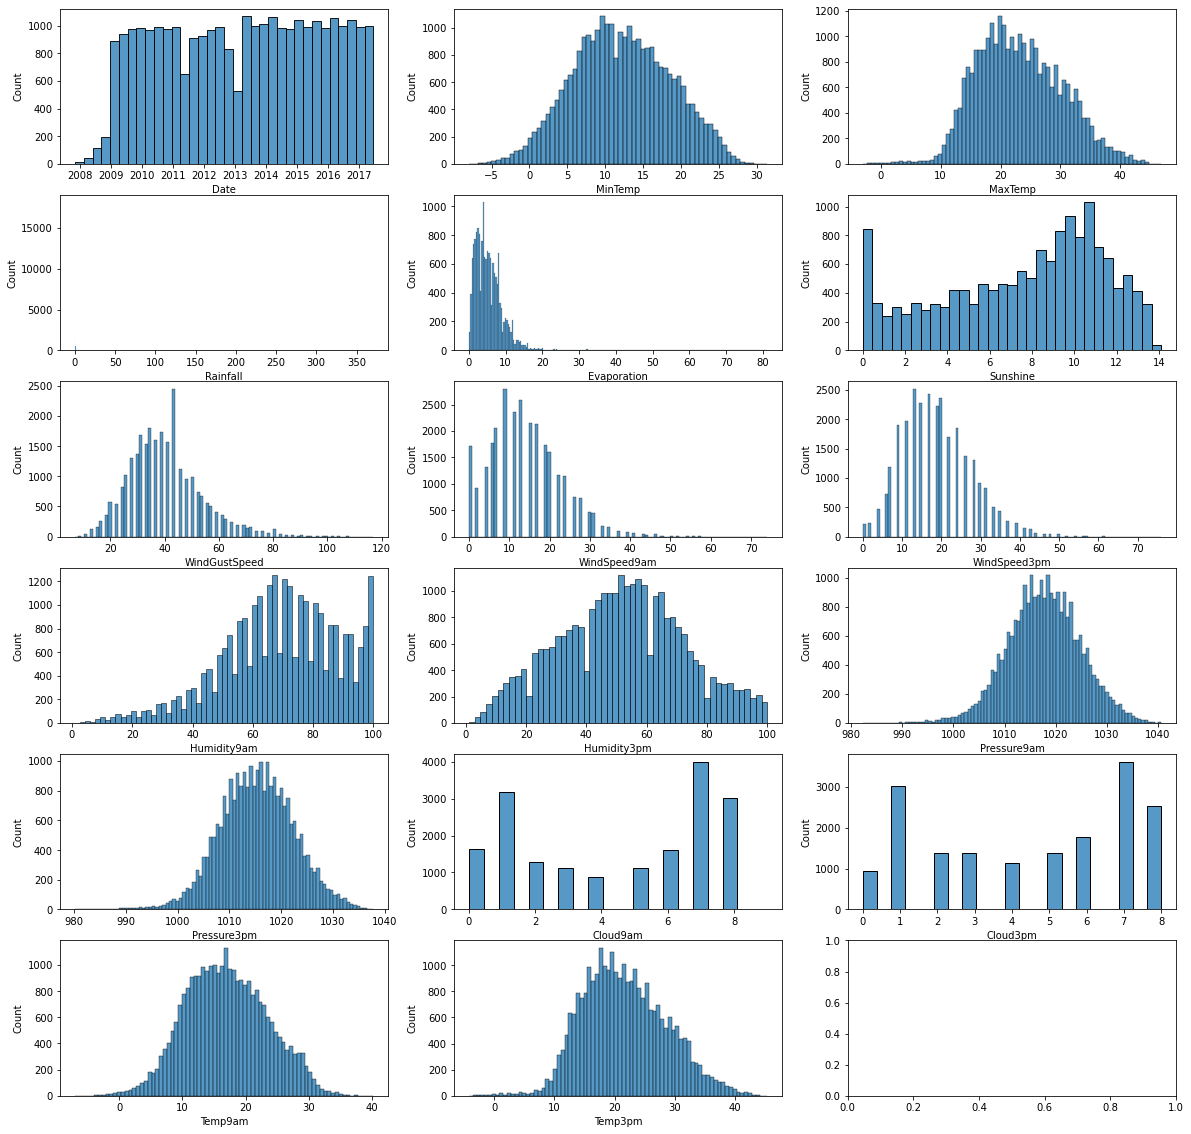

In [17]:
distributionPlots(X_test, X_test.select_dtypes(exclude=['category', object]).columns.values)


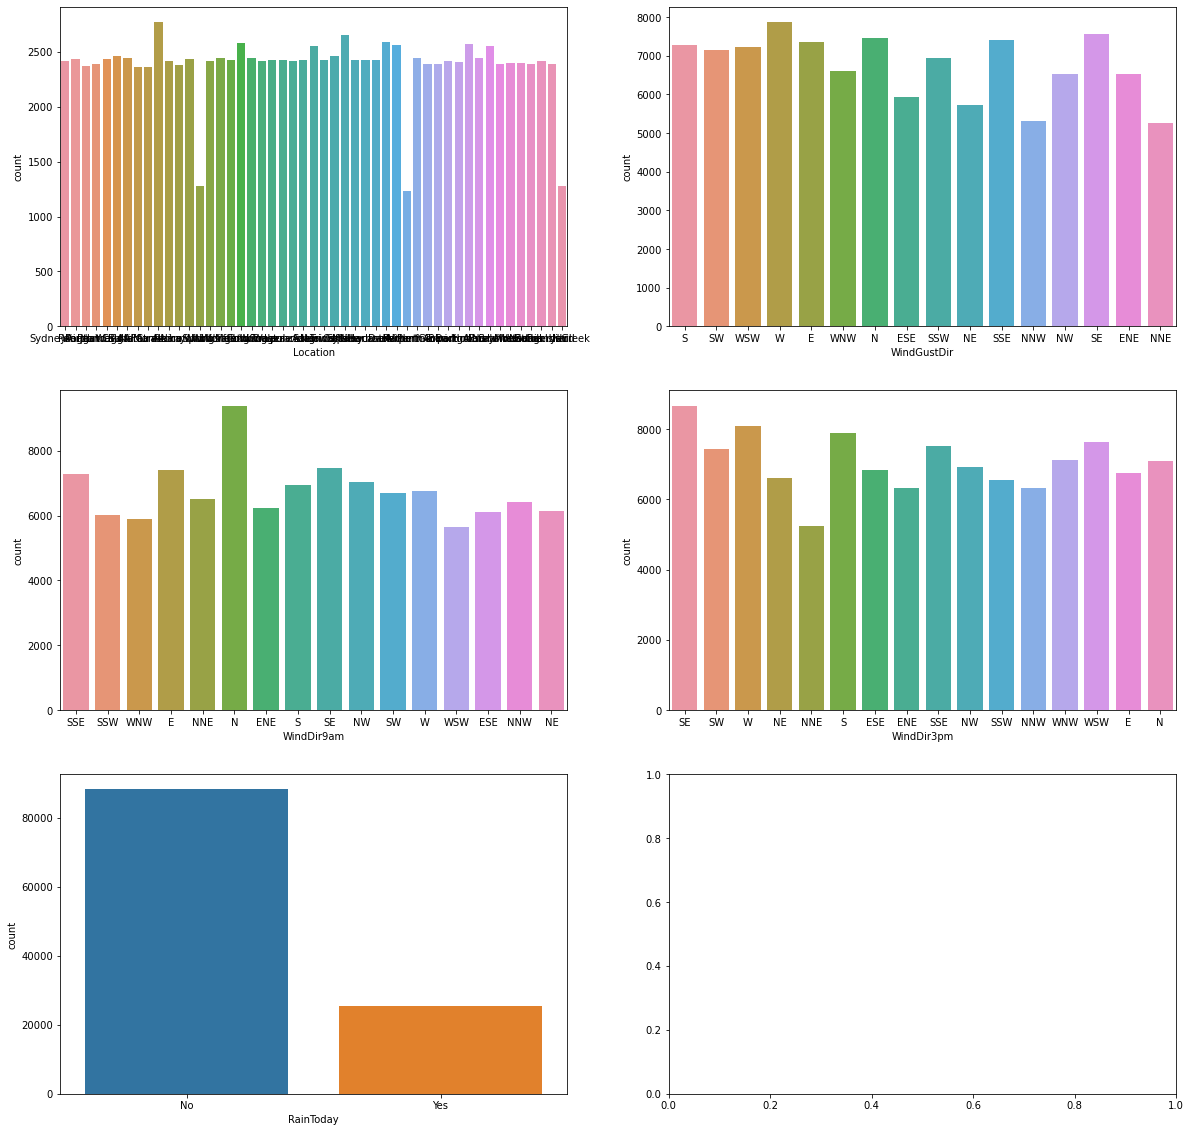

In [17]:
countPlots(X_train, X_train.select_dtypes(include=['category', object]).columns.values)

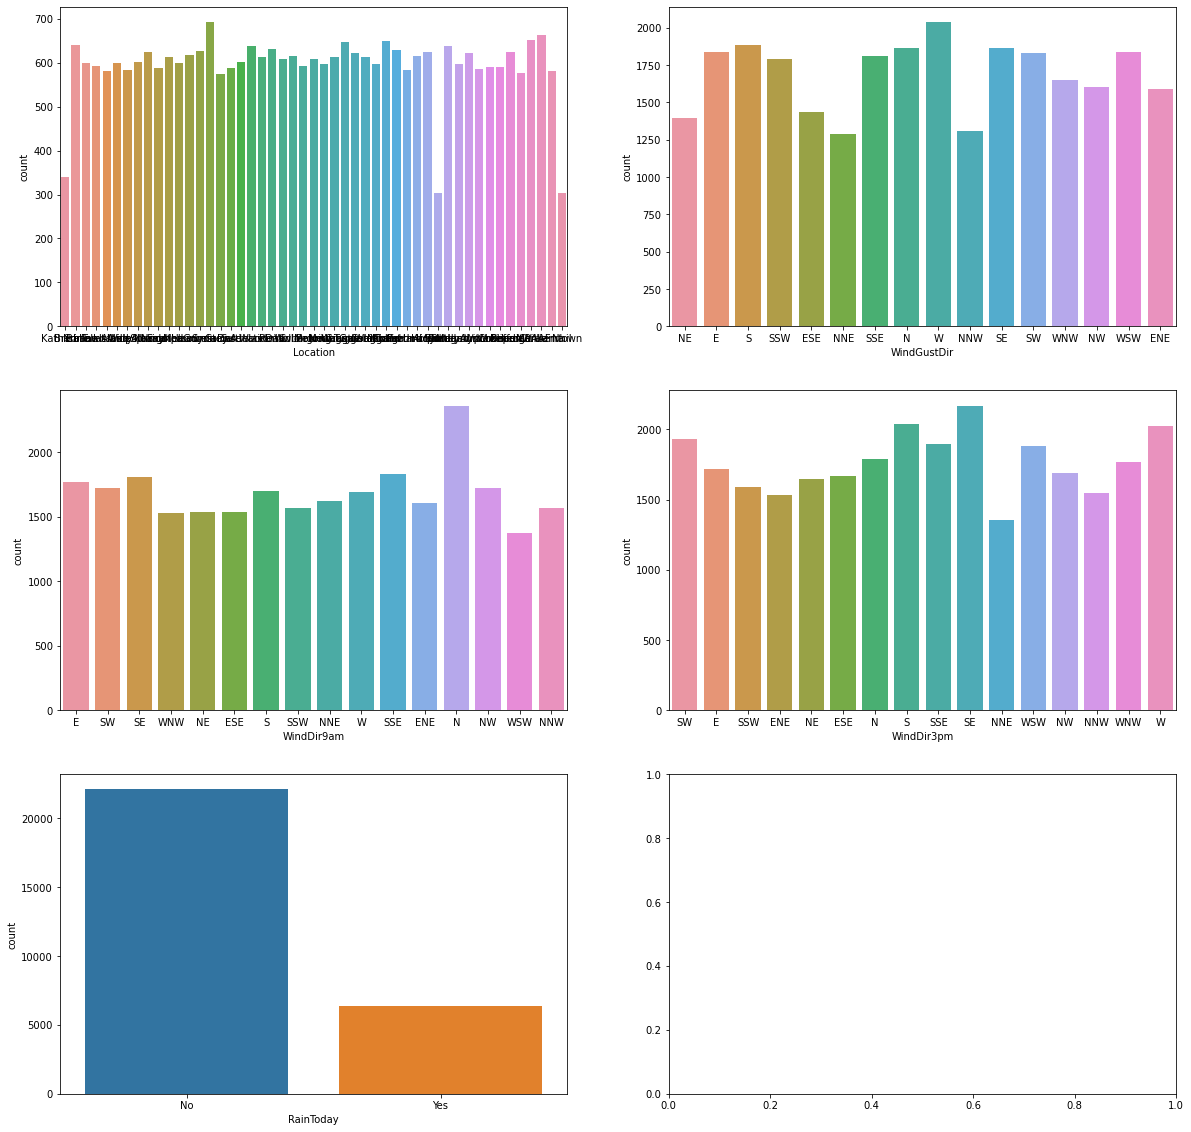

In [18]:
countPlots(X_test, X_test.select_dtypes(include=['category', object]).columns.values)

* Las distribuciones se asemejan en train y test

In [19]:
for column in weather_aus_df.select_dtypes(include=['category', object]).columns.values:
    if column != 'RainTomorrow':
        print('categórica {}, labels in train:{}, labels in test:{}'.format(column, len(X_train.dropna()[column].unique()), len(X_test.dropna()[column].unique())))

categórica Location, labels in train:26, labels in test:26
categórica WindGustDir, labels in train:16, labels in test:16
categórica WindDir9am, labels in train:16, labels in test:16
categórica WindDir3pm, labels in train:16, labels in test:16
categórica RainToday, labels in train:2, labels in test:2


* No hay ninguna etiqueta que aparezca en train y no en test y viceversa.

#### Revisar distribución de variable de salida


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

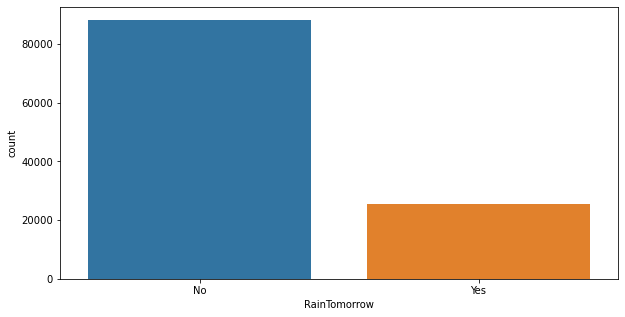

In [21]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x ='RainTomorrow' ,
              data = y_train.to_frame(), ax=axes)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

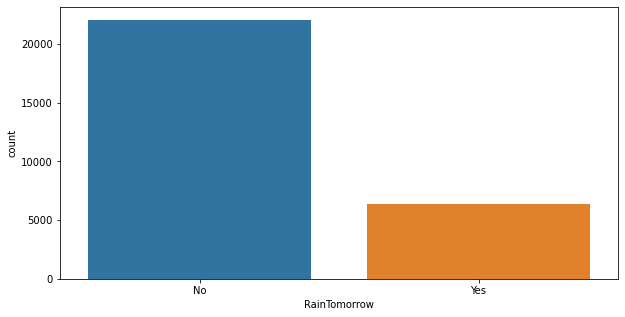

In [22]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x ='RainTomorrow' ,
              data = y_test.to_frame(), ax=axes)

* Tenemos la misma distribución de la variable de salida en train y test

#### Porcentaje Valores faltantes en Train y Test

In [20]:
count_nulls = pd.concat([X_train, y_train], axis=1).isnull().sum().sort_values(ascending=False)
count_nulls/len(X_train) * 100

Sunshine         48.031246
Evaporation      43.232676
Cloud3pm         40.768940
Cloud9am         38.401451
Pressure9am      10.363674
Pressure3pm      10.337034
WindDir9am        7.255431
WindGustDir       7.114499
WindGustSpeed     7.068954
Humidity3pm       3.068713
WindDir3pm        2.911453
Temp3pm           2.455142
Rainfall          2.273821
RainToday         2.273821
RainTomorrow      2.266946
WindSpeed3pm      2.108827
Humidity9am       1.814932
WindSpeed9am      1.242610
Temp9am           1.210814
MinTemp           1.020899
MaxTemp           0.867936
Location          0.000000
Date              0.000000
dtype: float64

Similares cantidades de valores faltantes en train y test

In [21]:
count_nulls = pd.concat([X_test, y_test], axis=1).isnull().sum().sort_values(ascending=False)
count_nulls/len(X_test) * 100

Sunshine         47.923828
Evaporation      42.901829
Cloud3pm         40.959714
Cloud9am         38.501994
Pressure9am      10.329300
Pressure3pm      10.308676
WindDir9am        7.297539
WindGustDir       7.036299
WindGustSpeed     7.001925
Humidity3pm       3.217379
WindDir3pm        2.887392
Temp3pm           2.584903
RainTomorrow      2.162106
Rainfall          2.113983
RainToday         2.113983
WindSpeed3pm      2.089922
Humidity9am       1.863055
Temp9am           1.230579
WindSpeed9am      1.103396
MinTemp           1.020899
MaxTemp           0.862780
Location          0.000000
Date              0.000000
dtype: float64

En general las distribuciones de las variables numéricas y categóricas se mantienen en train y test, la variable de salida tambien mantiene similar distribución

### 3. Limpieza y preparación de datos / ingeniería de features

#### Imputación de Valores faltantes

In [22]:
train_df = pd.concat([X_train, y_train], axis=1)

count_nulls = train_df.isnull().sum().sort_values(ascending=False)
print("# columnas con datos faltantes: ", len(count_nulls[count_nulls > 0]))
print('Porcentaje de datos faltantes x Columna: ')
count_nulls/len(train_df) * 100

# columnas con datos faltantes:  21
Porcentaje de datos faltantes x Columna: 


Sunshine         48.031246
Evaporation      43.232676
Cloud3pm         40.768940
Cloud9am         38.401451
Pressure9am      10.363674
Pressure3pm      10.337034
WindDir9am        7.255431
WindGustDir       7.114499
WindGustSpeed     7.068954
Humidity3pm       3.068713
WindDir3pm        2.911453
Temp3pm           2.455142
Rainfall          2.273821
RainToday         2.273821
RainTomorrow      2.266946
WindSpeed3pm      2.108827
Humidity9am       1.814932
WindSpeed9am      1.242610
Temp9am           1.210814
MinTemp           1.020899
MaxTemp           0.867936
Location          0.000000
Date              0.000000
dtype: float64

In [23]:
df1 = train_df[train_df.isnull().any(axis=1)]
print("filas con al menos 1 NaN (%) ", len(df1)/len(train_df) * 100)

filas con al menos 1 NaN (%)  61.18606489756634


* Alrededor del 61% de las filas cuentan con al menos 1 dato faltante, no podemos simplemente eliminarlas, analizamos la imputación de variables para cada columna.


#### Imputación de 'Sunshine'
Posee muchos valores faltantes (48%). Se elimina la columna porque imputarlo alteraría mucho su distribución.

#### Imputación de 'Evaporation'
Posee muchos valores faltantes (43%). Se elimina la columna porque imputarlo alteraría mucho su distribución.

#### Imputación de Cloud3pm y Cloud9am
Eliminar columnas Cloud3pm y Cloud9am, 40% y 38% de datos faltantes. Se elimina la columna porque imputarlo alteraría mucho su distribución.

In [24]:
train_df = train_df.drop(columns=['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'])

#### Imputación de Rainfall, RainToday y RainTomorrow

In [25]:
# nulos en 'Rainfall' y 'RainToday' en la misma fila
print(train_df['Rainfall'].isnull().sum(), len(train_df[train_df['Rainfall'].isnull() & train_df['RainToday'].isnull()]))

2646 2646


* Como Rainfall está relacionado con RainToday, podemos ver que ambos tienen nulos al mismo tiempo. Como la cantidad de nulos es 2.24% podemos simplemente eliminar las filas con datos faltantes.

In [26]:
train_df = train_df.dropna(subset=['Rainfall', 'RainToday'])

También eliminamos los nulos de 'RainTomorrow' porque son menor al 5%

In [27]:
train_df = train_df.dropna(subset=['RainTomorrow'])

#### Remover filas con nulos menor al 5%

In [28]:
train_df = train_df.dropna(subset=['MinTemp', 'MaxTemp', 'WindSpeed9am', 'Temp9am', 'Humidity9am', 'WindSpeed3pm', 'Temp3pm', 'WindDir3pm', 'Humidity3pm'])

#### Imputación de WindGustDir y WindDir9am (categóricas)
Imputación por categoría más frecuente

In [29]:
moda_WindGustDir = train_df['WindGustDir'].value_counts().index[0]
moda_WindDir9am = train_df['WindDir9am'].value_counts().index[0]
print('WindDir modas: ', moda_WindGustDir, moda_WindDir9am)

WindDir modas:  W N


In [30]:
train_df['WindGustDir'] = train_df['WindGustDir'].fillna(moda_WindGustDir)
train_df['WindDir9am'] = train_df['WindDir9am'].fillna(moda_WindDir9am)

#### Imputación de WindGustSpeed
Imputación por la mediana

In [31]:
median_WindGustSpeed = train_df['WindGustSpeed'].median()
print('WindGustSpeed mediana: ', median_WindGustSpeed)

WindGustSpeed mediana:  39.0


In [32]:
train_df['WindGustSpeed'] = train_df['WindGustSpeed'].fillna(median_WindGustSpeed)

#### Imputación de Pressure3pm y Pressure9am
presentan alrededor del 10% de nulos
Imputación por KNN o imputacion por mediana

In [33]:
median_Pressure9am = train_df['Pressure9am'].median()
print('Pressure9am mediana: ', median_Pressure9am)

median_Pressure3pm = train_df['Pressure3pm'].median()
print('Pressure3pm mediana: ', median_Pressure3pm)

Pressure9am mediana:  1017.7
Pressure3pm mediana:  1015.3


In [34]:
train_df['Pressure9am_median'] = train_df['Pressure9am'].fillna(median_Pressure9am)
train_df['Pressure3pm_median'] = train_df['Pressure3pm'].fillna(median_Pressure3pm)

In [55]:
knn_df = train_df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Pressure9am', 'Temp3pm', 'Temp9am']]
imputer = KNNImputer(n_neighbors=3)
knn_scaler = StandardScaler()
x_knn_scaled = knn_scaler.fit_transform(knn_df)
X_train_knn_imp = imputer.fit_transform(x_knn_scaled)

In [56]:
# transformada inversa
X_train_knn_inv = knn_scaler.inverse_transform(X_train_knn_imp)

In [58]:
train_df.loc[:, 'Pressure3pm'] = X_train_knn_inv[:, 7]
train_df.loc[:, 'Pressure9am'] = X_train_knn_inv[:, 8]

#### Codificación de variables categóricas

### Date
Para esta variable compuesta, hacemos la descomposición en año, mes y día

In [59]:
train_df.loc[:,'Date_day'] = train_df['Date'].apply(lambda  x: x.day)
train_df.loc[:,'Date_month'] = train_df['Date'].apply(lambda  x: x.month)
train_df.loc[:,'Date_year'] = train_df['Date'].apply(lambda  x: x.year)

In [60]:
# codificamos con una transformacion sin y cosine al número de dias
train_df.loc[:,'Date_daysOfYear'] =  train_df['Date'].apply(lambda  x: x.day_of_year)
train_df['Date_daysOfYear_sin'] = train_df['Date_daysOfYear'].apply(lambda  x: np.sin(x/365 *2*np.pi))
train_df['Date_daysOfYear_cos'] = train_df['Date_daysOfYear'].apply(lambda  x: np.cos(x/365 *2*np.pi))

* Podríamos pensar que el mes tiene más relacion con la variable objetivo porque nos da una idea de la estación.
* asumimos que el year no aporta mucha información, porque es un numero creciente.
* En cambio el month y day tiene una nocion cíclica que se podría aprovechar.

### Location
Hacemos label encoding porque genera solo 1 columna, si aplicáramos dummy encoding generaría 48 columnas


In [94]:
location_le = LabelEncoder()
location_le.fit(train_df['Location'])
len(list(location_le.classes_))

49

In [95]:
train_df.loc[:, 'Location_le'] = location_le.transform(train_df['Location'])

* Sabemos que no es la mejor opción usar esta codificación para modelos lineales, lo usaremos para alimentar un modelo basado en arbol.

### WindGustDir, WindDir3pm y WindDir9am
Hacemos una transformación por sin y cos o label encoding

In [62]:
# traduccion a grados sexagesimales
windDir_grados = {'E': 0, 'ENE': 22.5, 'NE': 45, 'NNE': 67.5, 'N':90, 'NNW': 112.5, 'NW': 135, 'WNW': 157.5, 'W': 180,
                  'WSW':202.5, 'SW': 225, 'SSW':247.5, 'S':270, 'SSE':292.5, 'SE':315, 'ESE': 337.5}

In [63]:
def sin_wind_dir(wind):
    return np.sin(windDir_grados[wind]*np.pi/180)
def cos_wind_dir(wind):
    return np.cos(windDir_grados[wind]*np.pi/180)

train_df['WindGustDir_sin'] = train_df['WindGustDir'].apply(sin_wind_dir)
train_df['WindGustDir_cos'] = train_df['WindGustDir'].apply(cos_wind_dir)
train_df['WindDir3pm_sin'] = train_df['WindDir3pm'].apply(sin_wind_dir)
train_df['WindDir3pm_cos'] = train_df['WindDir3pm'].apply(cos_wind_dir)
train_df['WindDir9am_sin'] = train_df['WindDir9am'].apply(sin_wind_dir)
train_df['WindDir9am_cos'] = train_df['WindDir9am'].apply(cos_wind_dir)

In [64]:
windDir_le = LabelEncoder()
windDir_le.fit(train_df['WindGustDir'])
len(list(windDir_le.classes_))

16

In [65]:
train_df.loc[:, 'WindGustDir_le'] = windDir_le.transform(train_df['WindGustDir'])
train_df.loc[:, 'WindDir3pm_le'] = windDir_le.transform(train_df['WindDir3pm'])
train_df.loc[:, 'WindDir9am_le'] = windDir_le.transform(train_df['WindDir9am'])

### 'RainToday' y 'RainTomorrow'
dummy encoding, como solo hay dos clases, conviene reemplazar yes=1 y no=0


In [66]:
train_df.loc[:, 'RainToday_enc'] = train_df['RainToday'].replace(('Yes', 'No'), (1, 0))
train_df.loc[:, 'RainTomorrow_enc'] = train_df['RainTomorrow'].replace(('Yes', 'No'), (1, 0))

#### Tratamiento de valores extremos
Análisis de valores extremos

In [67]:
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

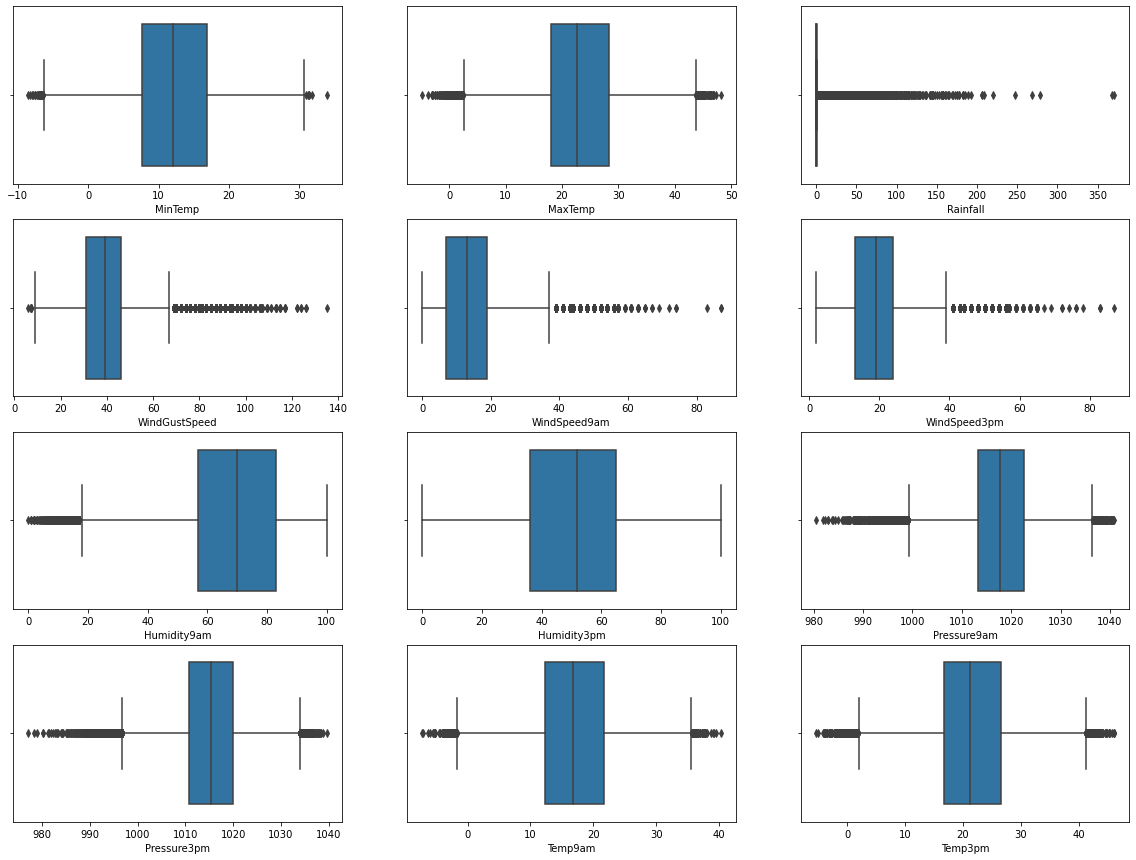

In [68]:
def boxplots(df, columns):
    fig, axes =plt.subplots(4,3, figsize=(20,15))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(columns):
            sns.boxplot(data = df, x = columns[i], ax=ax)
            i+=1

boxplots(train_df, columns)


* Podríamos eliminar outliers de distribuciones que se asemejen mas a una normal: 'MinTemp', 'MaxTemp',  'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'
* WinGustSpeed, WindSpeed9am y WindSpeed3pm como vimos antes no poseen muchas muestras, por lo tanto, no se puede decir mucho sobre los outliers.
* A simple vista podríamos pensar que 'Rainfall' presenta muchos outliers, puede que no se tengan muchas muestras que completen su distribución.

### Rainfall
Podríamos intuir que posee muchos outliers

In [69]:
train_df[train_df['RainToday'] == 'Yes']['Rainfall'].describe()

count    23899.000000
mean        10.206126
std         15.573041
min          1.100000
25%          2.400000
50%          5.200000
75%         11.600000
max        371.000000
Name: Rainfall, dtype: float64

In [70]:
train_df[train_df['RainToday'] == 'No']['Rainfall'].describe()

count    83757.000000
mean         0.074664
std          0.198363
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Rainfall, dtype: float64

* Notamos que cuando Rainfall>1mm entonces RainToday=Yes

<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

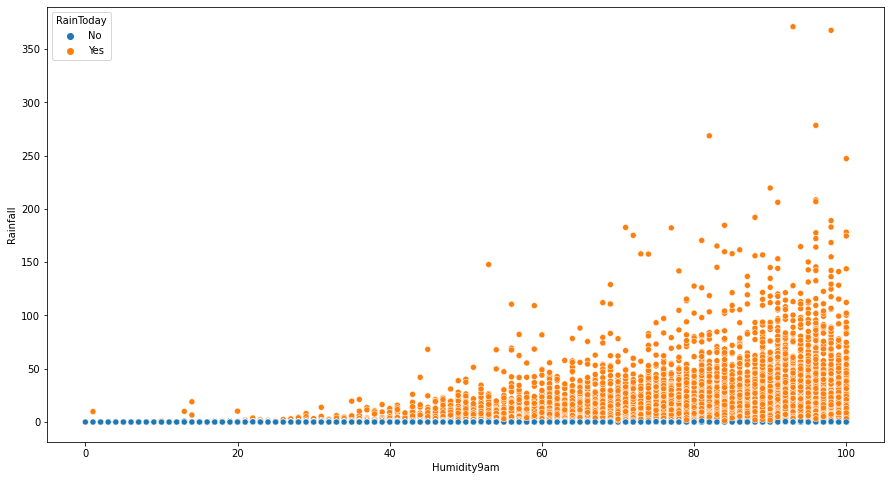

In [71]:
# scatter plot con la variable Humidity9am
fig,axes = plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(data=train_df, x="Humidity9am", y="Rainfall", hue="RainToday", ax=axes)

* El boxplot no muestra la distribución real de Rainfall, esto debido a que RainToday está desbalanceado.
* No podemos simplemente eliminar los outliers, porque eliminaríamos muchos casos de 'RainToday'=Yes

### Funciones de preprocesamiento
Con base en lo definido en imputación y codificación de variables categóricas, construimos funciones con diferentes preprocesamientos.

In [74]:
'''
# 'WindGustDir y WindDir9am': imputación por moda
# 'WindGustSpeed': imputación por mediana
# 'Pressure3pm' y 'Pressure9am': imputación por kNN

# 'Date' days of year sin/cosine transformation
# 'Location': label encoding
# 'WindGustDir, WindDir9am, WindDir3pm': sin/cosine transformation
# 'RainToday, RainTomorrow': dummy encoding
'''
def pre_processing_1(XY_df):
    XY_result_df = XY_df.copy(deep=True)

    # drop columns with >40% faltantes
    XY_result_df = XY_result_df.drop(columns=['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'])

    # dropna RainTomorrow, Rainfall y RainToday
    XY_result_df = XY_result_df.dropna(subset=['Rainfall', 'RainToday'])
    XY_result_df = XY_result_df.dropna(subset=['RainTomorrow'])

    # drop nulls < 5%
    XY_result_df = XY_result_df.dropna(subset=['MinTemp', 'MaxTemp', 'WindSpeed9am', 'Temp9am', 'Humidity9am', 'WindSpeed3pm', 'Temp3pm', 'WindDir3pm', 'Humidity3pm'])

    # WindGustDir y WindDir9am imputer por moda
    XY_result_df['WindGustDir'] = XY_result_df['WindGustDir'].fillna(moda_WindGustDir)
    XY_result_df['WindDir9am'] = XY_result_df['WindDir9am'].fillna(moda_WindDir9am)

    # WindGustSpeed imputer por median
    XY_result_df['WindGustSpeed'] = XY_result_df['WindGustSpeed'].fillna(median_WindGustSpeed)

    # kNN imputer Pressure3pm y Pressure9am

    knn_df = XY_result_df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Pressure9am', 'Temp3pm', 'Temp9am']]
    knn_df_scaled = knn_scaler.transform(knn_df)
    X_train_knn_imp = imputer.transform(knn_df_scaled)
    X_train_knn_imp = knn_scaler.inverse_transform(X_train_knn_imp)

    XY_result_df.loc[:, 'Pressure3pm'] = X_train_knn_imp[:, 7]
    XY_result_df.loc[:, 'Pressure9am'] = X_train_knn_imp[:, 8]

    # Date encoding
    XY_result_df.loc[:,'Date_day'] = XY_result_df['Date'].apply(lambda  x: x.day)
    XY_result_df.loc[:,'Date_month'] = XY_result_df['Date'].apply(lambda  x: x.month)
    XY_result_df.loc[:,'Date_year'] = XY_result_df['Date'].apply(lambda  x: x.year)

    XY_result_df.loc[:,'Date_daysOfYear'] =  XY_result_df['Date'].apply(lambda  x: x.day_of_year)
    XY_result_df['Date_daysOfYear_sin'] = XY_result_df['Date_daysOfYear'].apply(lambda  x: np.sin(x/365 *2*np.pi))
    XY_result_df['Date_daysOfYear_cos'] = XY_result_df['Date_daysOfYear'].apply(lambda  x: np.cos(x/365 *2*np.pi))

    # Location encoding
    XY_result_df.loc[:, 'Location_le'] = location_le.transform(XY_result_df['Location'])

    # wind direction encoding
    XY_result_df['WindGustDir_sin'] = XY_result_df['WindGustDir'].apply(sin_wind_dir)
    XY_result_df['WindGustDir_cos'] = XY_result_df['WindGustDir'].apply(cos_wind_dir)
    XY_result_df['WindDir3pm_sin'] = XY_result_df['WindDir3pm'].apply(sin_wind_dir)
    XY_result_df['WindDir3pm_cos'] = XY_result_df['WindDir3pm'].apply(cos_wind_dir)
    XY_result_df['WindDir9am_sin'] = XY_result_df['WindDir9am'].apply(sin_wind_dir)
    XY_result_df['WindDir9am_cos'] = XY_result_df['WindDir9am'].apply(cos_wind_dir)

    # rainToday, rainTomorrow encoding
    XY_result_df.loc[:, 'RainToday_enc'] = XY_result_df['RainToday'].replace(('Yes', 'No'), (1, 0))
    XY_result_df.loc[:, 'RainTomorrow_enc'] = XY_result_df['RainTomorrow'].replace(('Yes', 'No'), (1, 0))

    return XY_result_df


In [143]:
'''
# 'WindGustDir y WindDir9am': imputación por moda
# 'WindGustSpeed': imputación por mediana
# 'Pressure3pm y Pressure9am': imputación por mediana

# 'Date' days of year sin/cosine transformation
# 'Location': label encoding
# 'WindGustDir, WindDir9am, WindDir3pm': label encoding
# 'RainToday, RainTomorrow': dummy encoding
'''
def pre_processing_2(XY_df):
    XY_result_df = XY_df.copy(deep=True)

    # drop columns with >40% faltantes
    XY_result_df = XY_result_df.drop(columns=['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'])

    # dropna RainTomorrow, Rainfall y RainToday
    XY_result_df = XY_result_df.dropna(subset=['Rainfall', 'RainToday'])
    XY_result_df = XY_result_df.dropna(subset=['RainTomorrow'])

    # drop nulls < 5%
    XY_result_df = XY_result_df.dropna(subset=['MinTemp', 'MaxTemp', 'WindSpeed9am', 'Temp9am', 'Humidity9am', 'WindSpeed3pm', 'Temp3pm', 'WindDir3pm', 'Humidity3pm'])

    # WindGustDir y WindDir9am imputer por moda
    XY_result_df['WindGustDir'] = XY_result_df['WindGustDir'].fillna(moda_WindGustDir)
    XY_result_df['WindDir9am'] = XY_result_df['WindDir9am'].fillna(moda_WindDir9am)

    # WindGustSpeed imputer por median
    XY_result_df['WindGustSpeed'] = XY_result_df['WindGustSpeed'].fillna(median_WindGustSpeed)

    #Pressure3pm y Pressure9am imputación por mediana
    XY_result_df['Pressure9am_median'] = XY_result_df['Pressure9am'].fillna(median_Pressure9am)
    XY_result_df['Pressure3pm_median'] = XY_result_df['Pressure3pm'].fillna(median_Pressure3pm)


    # kNN imputer Pressure3pm y Pressure9am

    knn_df = XY_result_df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Pressure9am', 'Temp3pm', 'Temp9am']]
    knn_df_scaled = knn_scaler.transform(knn_df)
    X_train_knn_imp = imputer.transform(knn_df_scaled)
    X_train_knn_imp = knn_scaler.inverse_transform(X_train_knn_imp)

    XY_result_df.loc[:, 'Pressure3pm'] = X_train_knn_imp[:, 7]
    XY_result_df.loc[:, 'Pressure9am'] = X_train_knn_imp[:, 8]


    # Date encoding
    XY_result_df.loc[:,'Date_day'] = XY_result_df['Date'].apply(lambda  x: x.day)
    XY_result_df.loc[:,'Date_month'] = XY_result_df['Date'].apply(lambda  x: x.month)
    XY_result_df.loc[:,'Date_year'] = XY_result_df['Date'].apply(lambda  x: x.year)

    XY_result_df.loc[:,'Date_daysOfYear'] =  XY_result_df['Date'].apply(lambda  x: x.day_of_year)
    XY_result_df['Date_daysOfYear_sin'] = XY_result_df['Date_daysOfYear'].apply(lambda  x: np.sin(x/365 *2*np.pi))
    XY_result_df['Date_daysOfYear_cos'] = XY_result_df['Date_daysOfYear'].apply(lambda  x: np.cos(x/365 *2*np.pi))

    # Location encoding
    XY_result_df.loc[:, 'Location_le'] = location_le.transform(XY_result_df['Location'])

    # wind direction encoding
    XY_result_df.loc[:, 'WindGustDir_le'] = windDir_le.transform(XY_result_df['WindGustDir'])
    XY_result_df.loc[:, 'WindDir3pm_le'] = windDir_le.transform(XY_result_df['WindDir3pm'])
    XY_result_df.loc[:, 'WindDir9am_le'] = windDir_le.transform(XY_result_df['WindDir9am'])

    # rainToday, rainTomorrow encoding
    XY_result_df.loc[:, 'RainToday_enc'] = XY_result_df['RainToday'].replace(('Yes', 'No'), (1, 0))
    XY_result_df.loc[:, 'RainTomorrow_enc'] = XY_result_df['RainTomorrow'].replace(('Yes', 'No'), (1, 0))

    return XY_result_df

In [96]:
train_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Pressure9am_median,Pressure3pm_median,Date_daysOfYear,Date_daysOfYear_sin,Date_daysOfYear_cos,Date_day,Date_month,Date_year,WindGustDir_sin,WindGustDir_cos,WindDir3pm_sin,WindDir3pm_cos,WindDir9am_sin,WindDir9am_cos,WindGustDir_le,WindDir3pm_le,WindDir9am_le,RainToday_enc,RainTomorrow_enc,Location_le
35581,2014-11-21,SydneyAirport,22.1,37.0,0.0,S,63.0,SSE,SE,22.0,26.0,64.0,58.0,1007.500000,1004.900000,25.5,27.4,No,No,1007.5,1004.9,325,-0.635432,0.772157,21,11,2014,-1.000000e+00,-1.836970e-16,-7.071068e-01,0.707107,-0.923880,0.382683,8,9,10,0,0,38
26052,2014-06-07,Penrith,10.4,19.6,0.0,SW,22.0,SSW,SW,9.0,7.0,53.0,43.0,1017.066667,1014.566667,14.9,19.5,No,No,1017.7,1015.3,158,0.409356,-0.912375,7,6,2014,-7.071068e-01,-7.071068e-01,-7.071068e-01,-0.707107,-0.923880,-0.382683,12,12,11,0,0,30
77079,2014-12-29,Portland,8.4,18.5,5.8,WSW,70.0,WNW,W,26.0,48.0,95.0,60.0,1000.200000,1003.800000,13.2,17.1,Yes,Yes,1000.2,1003.8,363,-0.034422,0.999407,29,12,2014,-3.826834e-01,-9.238795e-01,1.224647e-16,-1.000000,0.382683,-0.923880,15,13,14,1,1,33
38082,2013-07-01,WaggaWagga,4.3,11.9,0.2,W,17.0,E,W,11.0,11.0,99.0,91.0,1026.800000,1025.000000,5.6,10.9,No,No,1026.8,1025.0,182,0.008607,-0.999963,1,7,2013,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000,0.000000,1.000000,13,13,0,0,0,42
114704,2009-03-26,PearceRAAF,12.9,34.2,0.0,E,46.0,E,NE,28.0,11.0,59.0,23.0,1020.900000,1018.200000,19.5,32.4,No,No,1020.9,1018.2,85,0.994218,0.107381,26,3,2009,0.000000e+00,1.000000e+00,7.071068e-01,0.707107,0.000000,1.000000,0,4,0,0,0,29


#### Seleccion de features

In [98]:
numeric_c_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed3pm', 'WindSpeed9am', 'Humidity3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Date_daysOfYear_sin', 'Date_daysOfYear_cos', 'WindDir9am_sin', 'WindDir9am_cos', 'WindDir3pm_sin', 'WindDir3pm_cos', 'WindGustDir_sin', 'WindGustDir_cos']

numeric_d_columns = ['Location_le', 'Date_day', 'Date_month', 'Date_year', 'Date_daysOfYear', 'RainToday_enc', 'WindGustDir_le', 'WindDir3pm_le', 'WindDir9am_le']

categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
target_column=['RainTomorrow_enc']

XY_train_df = train_df
X_train_df = train_df.drop(columns='RainTomorrow_enc')
y_train_df = train_df[target_column]

In [79]:
XY_train_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Pressure9am_median,Pressure3pm_median,Date_daysOfYear,Date_daysOfYear_sin,Date_daysOfYear_cos,Date_day,Date_month,Date_year,WindGustDir_sin,WindGustDir_cos,WindDir3pm_sin,WindDir3pm_cos,WindDir9am_sin,WindDir9am_cos,WindGustDir_le,WindDir3pm_le,WindDir9am_le,RainToday_enc,RainTomorrow_enc
35581,2014-11-21,SydneyAirport,22.1,37.0,0.0,S,63.0,SSE,SE,22.0,26.0,64.0,58.0,1007.500000,1004.900000,25.5,27.4,No,No,1007.5,1004.9,325,-0.635432,0.772157,21,11,2014,-1.000000e+00,-1.836970e-16,-7.071068e-01,0.707107,-0.923880,0.382683,8,9,10,0,0
26052,2014-06-07,Penrith,10.4,19.6,0.0,SW,22.0,SSW,SW,9.0,7.0,53.0,43.0,1017.066667,1014.566667,14.9,19.5,No,No,1017.7,1015.3,158,0.409356,-0.912375,7,6,2014,-7.071068e-01,-7.071068e-01,-7.071068e-01,-0.707107,-0.923880,-0.382683,12,12,11,0,0
77079,2014-12-29,Portland,8.4,18.5,5.8,WSW,70.0,WNW,W,26.0,48.0,95.0,60.0,1000.200000,1003.800000,13.2,17.1,Yes,Yes,1000.2,1003.8,363,-0.034422,0.999407,29,12,2014,-3.826834e-01,-9.238795e-01,1.224647e-16,-1.000000,0.382683,-0.923880,15,13,14,1,1
38082,2013-07-01,WaggaWagga,4.3,11.9,0.2,W,17.0,E,W,11.0,11.0,99.0,91.0,1026.800000,1025.000000,5.6,10.9,No,No,1026.8,1025.0,182,0.008607,-0.999963,1,7,2013,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000,0.000000,1.000000,13,13,0,0,0
114704,2009-03-26,PearceRAAF,12.9,34.2,0.0,E,46.0,E,NE,28.0,11.0,59.0,23.0,1020.900000,1018.200000,19.5,32.4,No,No,1020.9,1018.2,85,0.994218,0.107381,26,3,2009,0.000000e+00,1.000000e+00,7.071068e-01,0.707107,0.000000,1.000000,0,4,0,0,0


#### Análisis de normalidad de variables continuas.

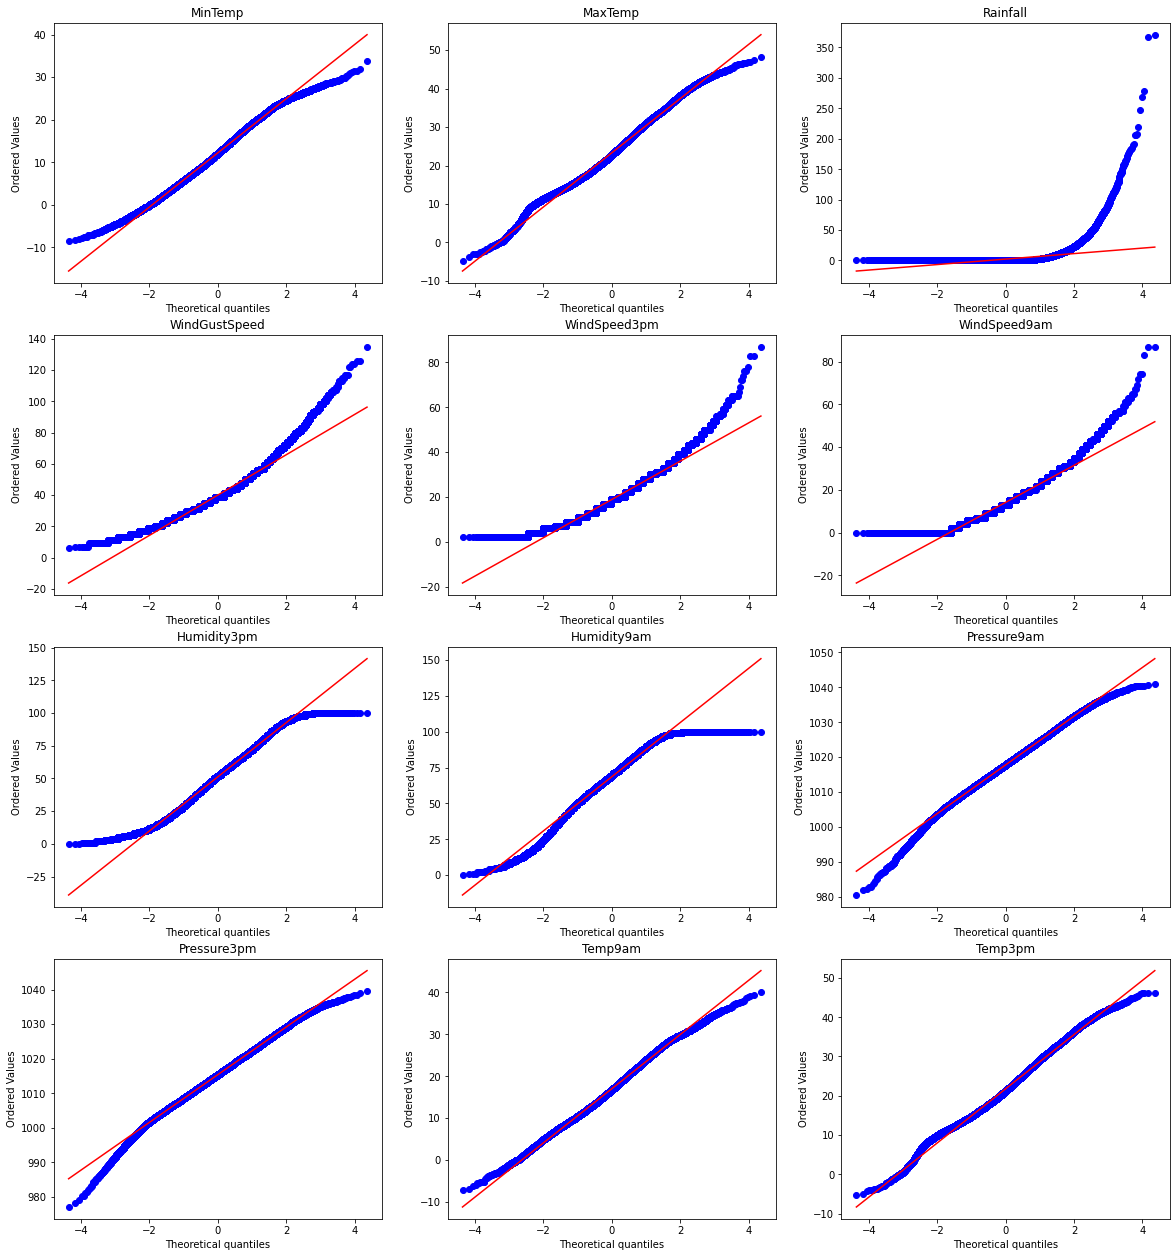

In [81]:
def qqPlots(df, numeric_columns):
    fig, axes =plt.subplots(4,3, figsize=(20,22))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(numeric_columns):
            stats.probplot(df[numeric_columns[i]], dist="norm", plot=ax)
            ax.set_title(numeric_columns[i])
            i+=1

qqPlots(XY_train_df, numeric_c_columns)

* Como vimos anteriormente MinTemp, MaxTemp, Pressure9am, Pressure3pm, Temp9am y Temp3pm se asemejan más a una normal.
por lo tanto podríamos analizar sus correlaciones con Pearson


#### Correlación pearson

In [83]:
normal_columns = ['MinTemp', 'MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

<AxesSubplot:>

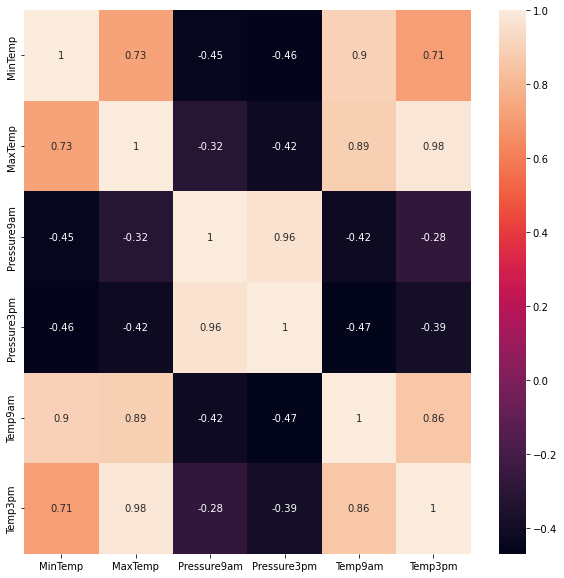

In [87]:
# correlacion pearson
correlation_matrix = XY_train_df[normal_columns].corr().round(2)
fig,axes = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes)

* Podemos ver que 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'MaxTemp' están altamente correlacionadas (escogeremos solo la que mejor se relacione con la salida)
* Podemos ver que 'Pressure9am' y 'Pressure3pm' están altamente correlacionadas
* También se puede apreciar un grado de correlación entre las variables de temperatura y de presión.

#### Correlación spearman

<AxesSubplot:>

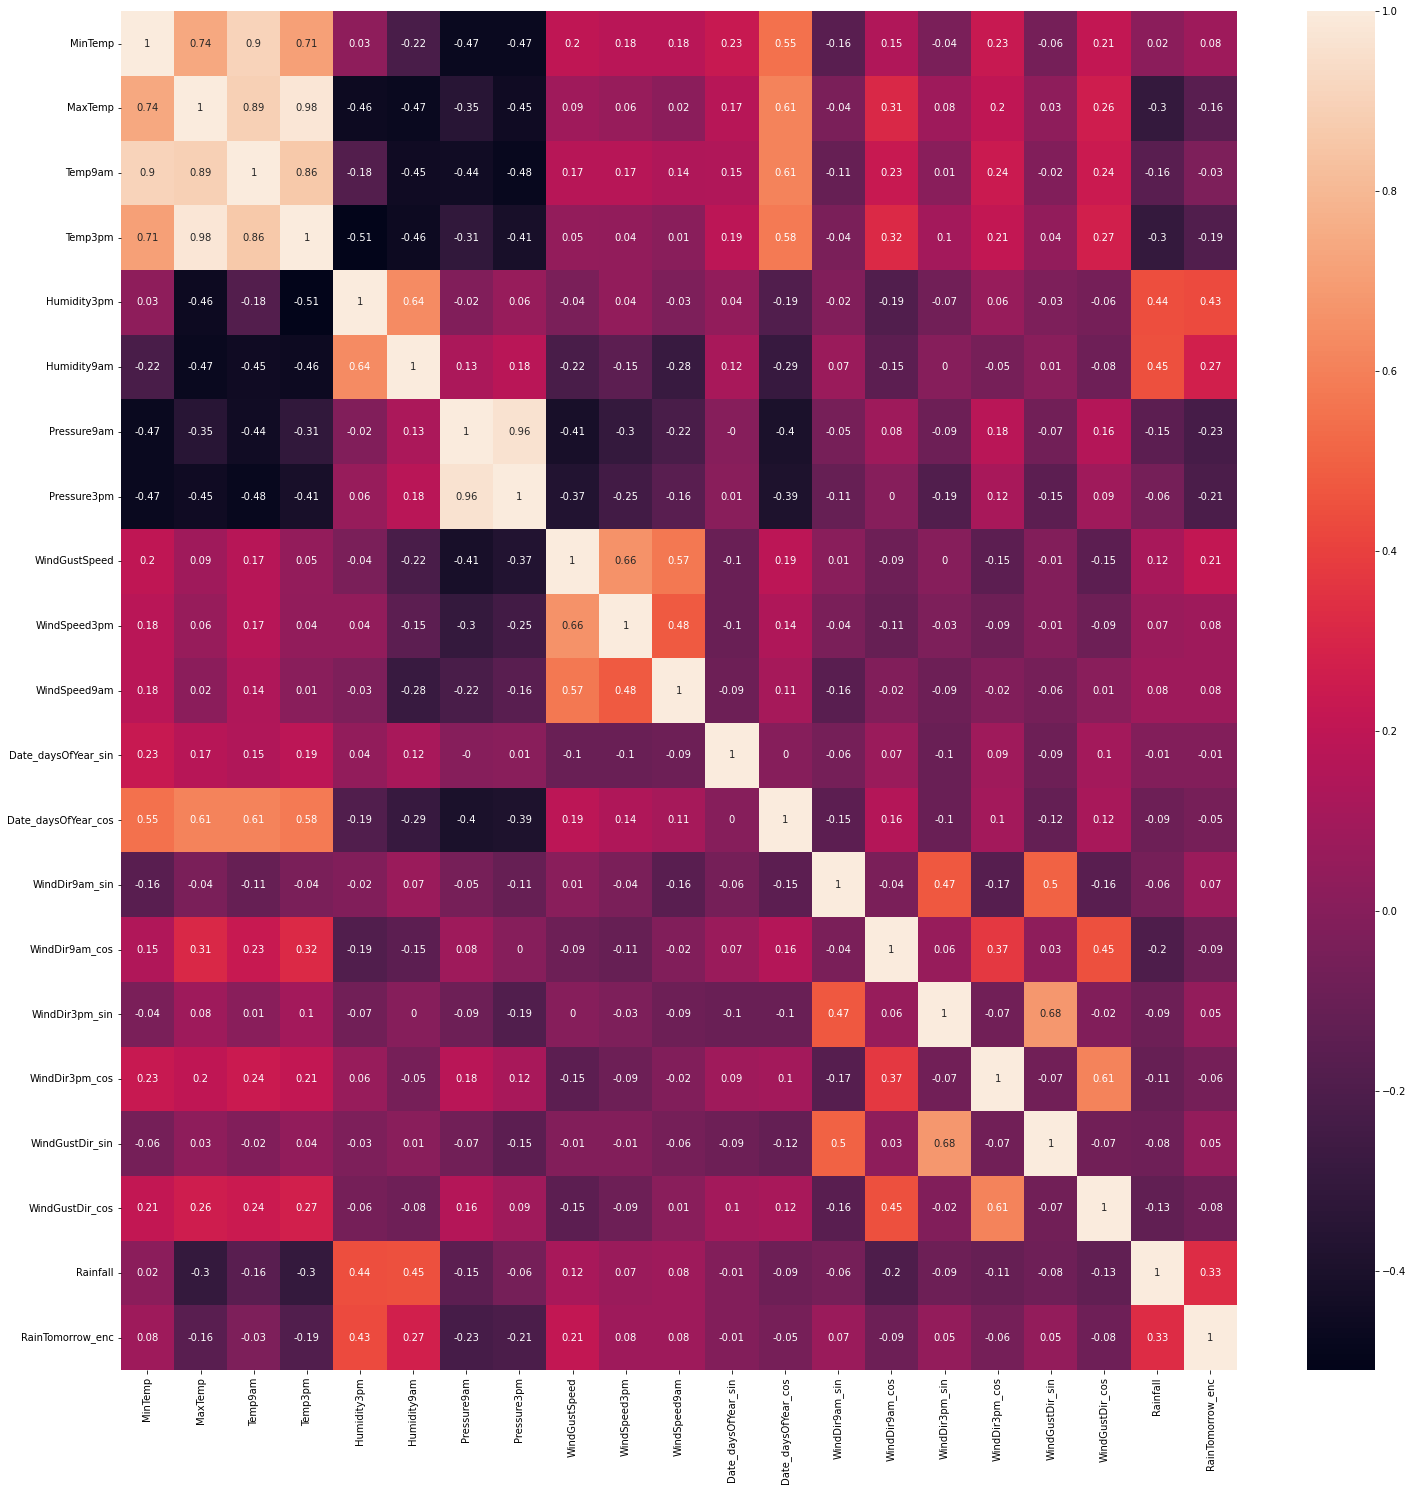

In [90]:
columns  = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Humidity3pm', 'Humidity9am','Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'WindSpeed3pm', 'WindSpeed9am', 'Date_daysOfYear_sin', 'Date_daysOfYear_cos', 'WindDir9am_sin', 'WindDir9am_cos', 'WindDir3pm_sin', 'WindDir3pm_cos', 'WindGustDir_sin', 'WindGustDir_cos', 'Rainfall', 'RainTomorrow_enc']
correlation_matrix = XY_train_df[columns].corr(method='spearman').round(2)
fig,axes = plt.subplots(1,1,figsize=(25,25))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes)

* 'Rainfall' tiene cierto grado de correlación con la variable de salida 'RainTomorrow', y también con 'Temp3pm', 'Humidity9am' y 'Humidity3pm'
* Las variables de 'WindGustSpeed', 'WindSpeed9am' y 'WindSpeed3pm' tienen mediana correlación entre si
* 'Humidity9am' y 'Humidity3pm' tienen mediana correlación entre ellas, y también contra 'MaxTemp', 'Temp3pm' y 'Temp9am'
* 'WindGustSpeed' tiene cierto grado de correlación contra 'Pressure9am' y 'Pressure3pm'
* Las variables de dirección de viento 'WindGustDir', 'WindDir3pm' y 'WindDir9am' tienen correlación entre si, convendrá tomar solo 1 de ellas.
* Encontramos que la variable 'Date_daysOfYear_cos' tiene una mediana correlación con las variables de temperatura
* Las variables de mayor correlación contra la variable de salida son: 'Humidity3pm', 'Rainfall', 'Humidity9am', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm', 'Temp3pm'


### Información Mutua¶

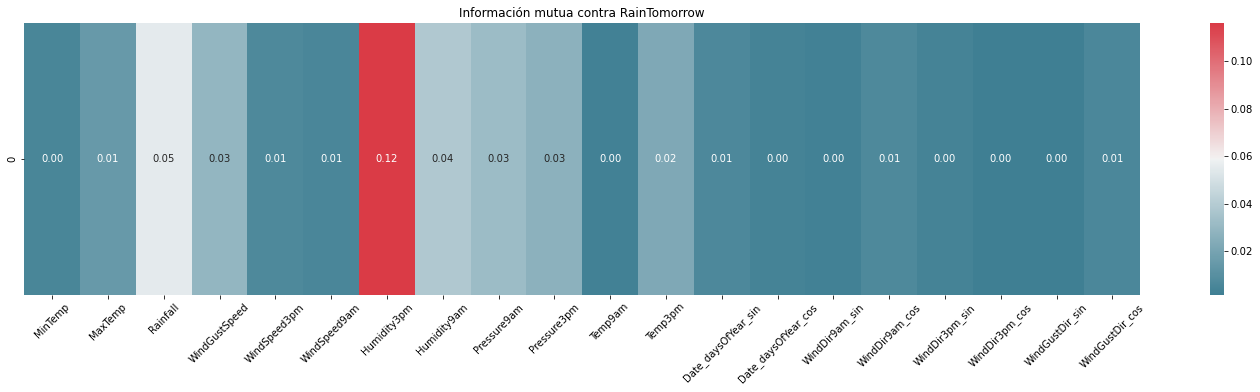

In [92]:
# informacion mutua
MI = mutual_info_classif(X_train_df[numeric_c_columns], y_train_df['RainTomorrow_enc'].to_numpy())
fig, ax = plt.subplots(1,1, figsize=(25,5))
ax.set_title('Información mutua contra RainTomorrow')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(numeric_c_columns)
ax.tick_params(axis='x', rotation=45)

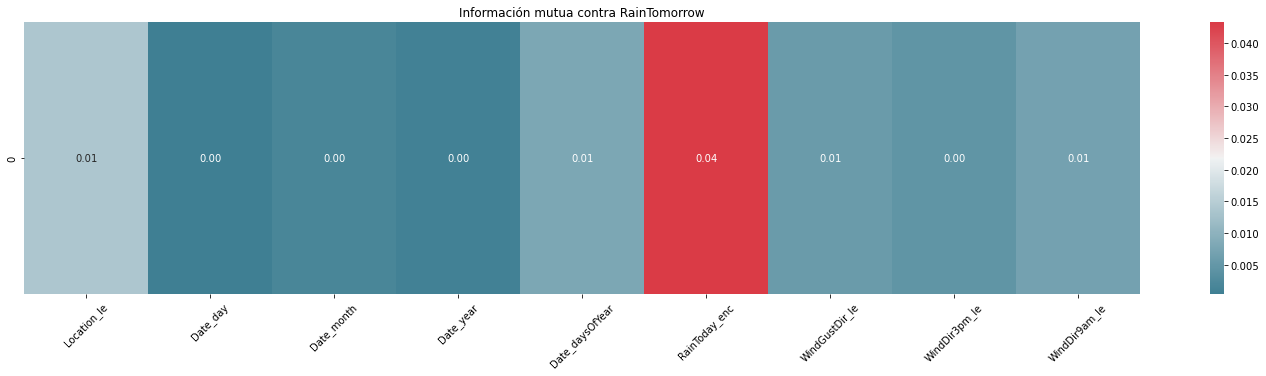

In [99]:
MI = mutual_info_classif(X_train_df[numeric_d_columns], y_train_df['RainTomorrow_enc'].to_numpy(), discrete_features=True)
fig, ax = plt.subplots(1,1, figsize=(25,5))
ax.set_title('Información mutua contra RainTomorrow')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(numeric_d_columns)
ax.tick_params(axis='x', rotation=45)

* Encontramos que las variables 'Humidity3pm', 'Humidity9am', 'Rainfall', 'RainToday', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm' y 'Temp3pm' presentar mayor información mutua contra la variable de salida.

#### Información mutua contra 'RainToday'

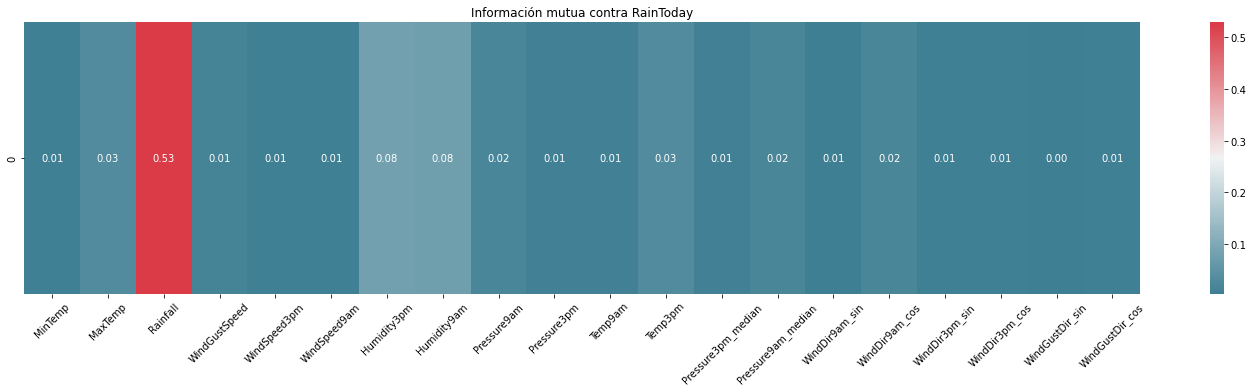

In [67]:
MI = mutual_info_classif(X_train_df[numeric_c_columns], X_train_df['RainToday_enc'].to_numpy())
fig, ax = plt.subplots(1,1, figsize=(25,5))
ax.set_title('Información mutua contra RainToday')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(numeric_c_columns)
ax.tick_params(axis='x', rotation=45)

* 'Rainfall' tiene alta correlación contra 'RainToday' como era de esperarse, debido a que RainToday se calcula a partir de 'Rainfall'
* Suponemos que los datos metereológicos del dia de hoy tienen una relacion con 'RainToday'.
* Como se observa 'Rainfall' y 'RainToday' tienen dependencia.

Del análisis anterior podemos decir que las mejores variables para predecir la variable de salida son:
'Humidity3pm', 'Rainfall', 'WindGustSpeed', 'Pressure9am' y 'Temp3pm'.

Probaremos 3 tipos de selección y comparamos resultados.

In [100]:
feature_selection_0 = ['WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Pressure9am', 'Rainfall']
feature_selection_1 = ['Date_daysOfYear_sin','WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Pressure9am', 'Rainfall']
feature_selection_2 = ['Date_daysOfYear_sin', 'WindDir9am_sin', 'WindDir9am_cos', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Pressure9am', 'Rainfall']

# para decision tree con label encoding
feature_selection_3 = ['Location_le', 'Date_daysOfYear', 'WindGustDir_le', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Pressure9am', 'Rainfall']

X_train_s1 = X_train_df[feature_selection_0]
X_train_s1 = X_train_df[feature_selection_1]
X_train_s2 = X_train_df[feature_selection_2]
X_train_s3 = X_train_df[feature_selection_3]
y_train = y_train_df

### 4. Entrenamiento de modelos

In [107]:
class LogisticRegressionNumpy(object):

    def __init__(self):
        self.w = None

    """
        :param X: X_train
        :param y: y_train
        :param lr: learning rate
        :param epochs: number of epochs
        :param b: batch size for mini-batch
        :param gradient: type of gradient descent: 'SGD', 'MINI', 'BGD'
    """
    def fit(self, X=None, y=None, lr=0.01, epochs=100, b=16, gradient='SGD'):

        X_expanded = np.hstack((np.ones((len(X),1)),X))

        if gradient == 'MINI':
            h, w = self.mini_batch_gradient_descent(X_expanded, y, lr, epochs, b)
            self.w = w
            return h, w

    def predict(self, X):
        X_expanded = np.hstack((np.ones((len(X),1)),X))
        pred = self.sigmoid(np.dot(X_expanded, self.w))
        return np.array([1 if i >= 0.5 else 0 for i in pred])

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def bce(self, X, y, theta):
        h = self.sigmoid(np.dot(X, theta))
        return (1 / len(y)) * ((np.dot((-y).T, np.log(h))) - (np.dot((1 - y).T, np.log(1 - h))))

    # definimos la función loss para reportarla cada cierta cantidad de epochs
    def loss(self, y, y_hat):
        loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
        return loss


    def mini_batch_gradient_descent(self, X, y, lr=0.01, amt_epochs=100, b=16):
        """
        shapes:
            X_train = nxm
            y_train = nx1
            W = mx1
        """

        n = X.shape[0]
        m = X.shape[1]

        # initialize random weights
        W = np.random.randn(m).reshape(m, 1)
        hist_cos = np.zeros((amt_epochs, 1))
        # iterate over the n_epochs
        for j in range(amt_epochs):

            # Shuffle all the samples
            idx = np.random.permutation(X.shape[0])
            X_train = X[idx]
            y_train = y[idx]

            # Calculate the batch size in samples as a function of the number of batches
            batch_size = int(len(X_train) / b)

            # Iterate over the batches
            for i in range(0, len(X_train), batch_size):
                end = i + batch_size if i + batch_size <= len(X_train) else len(X_train)
                batch_X = X_train[i: end]  # batch_size*m
                batch_y = y_train[i: end]  # batch_size*1

                # Update the weights
                #W = W - (lr / batch_size) * np.dot(batch_X.T, (self.sigmoid(np.dot(batch_X, W)) - batch_y))

                prediction = self.sigmoid(np.sum(np.transpose(W) * batch_X, axis=1))
                error = prediction.reshape(-1, 1) - batch_y.reshape(-1, 1)
                grad_sum = np.sum(error * batch_X, axis=0)
                grad_mul = 1 / batch_size * grad_sum
                gradient = np.transpose(grad_mul).reshape(-1, 1)

                W = W - (lr * gradient)

            hist_cos[j] = self.loss(y_train, self.sigmoid(np.dot(X_train, W)))
            #hist_cos[j] = self.bce(X_train, y_train, W)

        return hist_cos, W


class BaseMetric:
    def __init__(self, **kwargs):
        self.parameters = kwargs

    def __call__(self, *args, **kwargs):
        pass


class Metric(object):
    def __call__(self, target, prediction):
        return NotImplemented


class MSE(Metric):
    def __init__(self):
        Metric.__init__(self)

    def __call__(self, target, prediction):
        n = target.size
        return np.sum((target - prediction) ** 2) / n


class Accuracy(Metric):
    def __call__(self, target, prediction):
        return np.mean(target == prediction, axis=0)


class Precision(Metric):
    def __call__(self, target, prediction):
        inverse_truth = np.where(target == 0, 1, 0)
        inverse_predictions = np.where(prediction == 0, 1, 0)
        TP = np.sum(prediction * target)
        TN = np.sum(inverse_predictions * inverse_truth)
        FN = np.sum(target * inverse_predictions)
        FP = np.sum(prediction * inverse_truth)
        return TP / (TP + FP)


class Recall(Metric):
    def __call__(self, target, prediction):
        inverse_truth = np.where(target == 0, 1, 0)
        inverse_predictions = np.where(prediction == 0, 1, 0)
        TP = np.sum(prediction * target)
        TN = np.sum(inverse_predictions * inverse_truth)
        FN = np.sum(target * inverse_predictions)
        FP = np.sum(prediction * inverse_truth)
        return TP / (TP + FN)

* Usamos StratifiedKFold para mantener la misma distribución de etiquetas durante K-fold cv

In [102]:
# Proporcion de las clases en K-Fold
skf = StratifiedKFold(n_splits=5)

# revisamos si mantenemos las etiquetas tanto en train y validation
for train_index, test_index in skf.split(X_train_s1.values, y_train.values):
    print(y_train.iloc[train_index, :].value_counts().to_numpy()/len(train_index))
    print(y_train.iloc[test_index, :].value_counts().to_numpy()/len(test_index))

[0.78123403 0.21876597]
[0.78120936 0.21879064]
[0.78122496 0.21877504]
[0.78124565 0.21875435]
[0.78122496 0.21877504]
[0.78124565 0.21875435]
[0.78122496 0.21877504]
[0.78124565 0.21875435]
[0.78123657 0.21876343]
[0.7811992 0.2188008]


In [106]:
# K-folds, metrica F1-score
def k_folds(X, y, lr, b, epochs):
    f1score_list = []
    log_reg = LogisticRegressionNumpy()
    for train_index, test_index in skf.split(X, y):
        #scale
        X_train_scaled = scaler.transform(X[train_index])
        X_val_scaled = scaler.transform(X[test_index])

        #fit
        log_reg.fit(X=X_train_scaled, y=y[train_index], lr=lr, epochs=epochs, b=b, gradient='MINI')

        # metric
        y_val_predict = log_reg.predict(X_val_scaled)
        metrics_list = [Accuracy(), Precision(), Recall()]
        metrics = [metric(y[test_index].ravel(), y_val_predict.ravel()) for metric in metrics_list]
        F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
        f1score_list.append(F1)
    return np.mean(f1score_list)

## CASO 0:
pre_processing_1 + feature_selection_0

### Logistic Regression

In [103]:
X_train = X_train_df[feature_selection_0]
# scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)

In [104]:
XY_test = pre_processing_1(pd.concat([X_test, y_test], axis=1))

X_test_p1 = XY_test[feature_selection_0]
y_test_p1 = XY_test[['RainTomorrow_enc']]

X_test_scaled = scaler.transform(X_test_p1.values)

### ParameterGrid search

In [108]:
# seleccion de hiperparametros
param_grid = {'lr': [0.01, 0.05], 'epochs': [100], 'batch_size': [32, 64]}
grid = ParameterGrid(param_grid)

kfolds_list = np.zeros(len(list(grid)))
for i, params in enumerate(grid):
    kfolds_list[i] = k_folds(X_train.values, y_train.values, params['lr'], params['batch_size'], params['epochs'])

best_params = grid[np.argmax(kfolds_list)]
best_params

C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: invalid

{'lr': 0.05, 'epochs': 100, 'batch_size': 64}

In [109]:
# best parameter
print("Best hyperparameters: ", {'lr': 0.05, 'epochs': 100, 'batch_size': 64})

Best hyperparameters:  {'lr': 0.05, 'epochs': 100, 'batch_size': 64}


### Desempeño con test

In [110]:
log_reg = LogisticRegressionNumpy()

# train
h, w = log_reg.fit(X=X_train_scaled, y=y_train.values.reshape(-1, 1), lr=0.05, epochs=100, b=64, gradient='MINI')

# test
y_test_predict = log_reg.predict(X_test_scaled)

metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


Accuracy: 0.839310908145838
Precision: 0.7257281553398058
Recall: 0.4483505498167278
F1-score: 0.5542739443872298


Text(0.5, 1.0, 'Funcion de Costo')

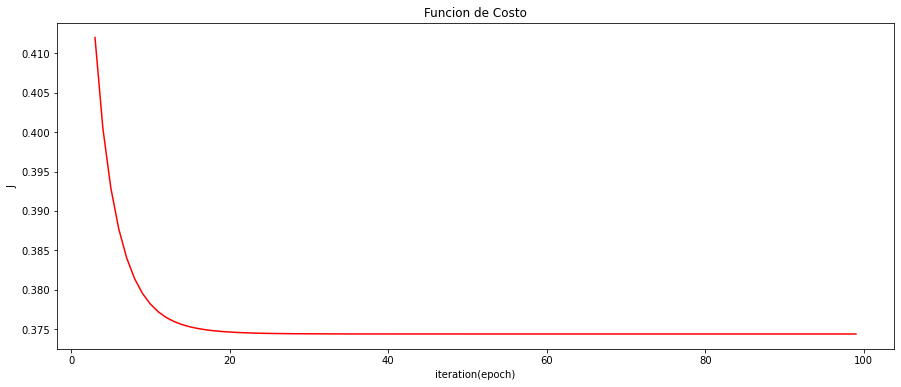

In [111]:
fig, axes = plt.subplots(1,1, figsize=(15,6))
axes.plot(range(len(h)), h, 'r')
axes.set_xlabel('iteration(epoch)')
axes.set_ylabel('J')
axes.set_title('Funcion de Costo')

### Logistic Regression con sklearn

In [112]:
# encontrar los mejores hiper parametros
grid={"C":[0.01,0.1,1, 10], "penalty":["l2"], 'solver':['liblinear', 'sag', 'saga']}# l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='f1')

logreg_cv.fit(X_train_scaled, y_train.values.ravel())

print('Best F1-Score {} with hyper-parameters {}'.format(logreg_cv.best_score_, logreg_cv.best_params_))


Best F1-Score 0.5536804983139965 with hyper-parameters {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


### Desempeño con test

In [114]:
clf = LogisticRegression(C=10, penalty='l2', fit_intercept=True, solver='liblinear', max_iter=100)
clf.fit(X_train_scaled, y_train.values.ravel())

y_test_predict = clf.predict(X_test_scaled)


metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

Accuracy: 0.839310908145838
Precision: 0.7260940032414911
Recall: 0.4478507164278574
F1-score: 0.5539983511953834


In [115]:
# result F1-score test
lreg_result_c0 = 0.5539983511953834
lreg_result_c0

0.5539983511953834

### RandomForest Classifier

### Desempeño con test

In [116]:
X_train_scaled = scaler.transform(X_train.values)

forest = RandomForestClassifier(max_depth=None, n_estimators=300, max_features=None, oob_score=True)
forest.fit(X_train_scaled, y_train.values.ravel())

X_test_scaled = scaler.transform(X_test_p1.values)
y_test_predict = forest.predict(X_test_scaled)
print('f1-score: ', f1_score(y_test_p1.values.ravel(), y_test_predict.ravel(), average='binary'))

f1-score:  0.5700615174299384


In [117]:
forest_result_c0 = 0.5700615174299384
forest_result_c0

0.5700615174299384

## CASO 1:
pre_processing_1 + feature_selection_1

### Logistic Regression

In [119]:
X_train = X_train_df[feature_selection_1]
# scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)

In [120]:
XY_test = pre_processing_1(pd.concat([X_test, y_test], axis=1))

X_test_p1 = XY_test[feature_selection_1]
y_test_p1 = XY_test[['RainTomorrow_enc']]

X_test_scaled = scaler.transform(X_test_p1.values)

### ParameterGrid search

In [121]:
# seleccion de hiperparametros
param_grid = {'lr': [0.01, 0.05], 'epochs': [100], 'batch_size': [32, 64]}
grid = ParameterGrid(param_grid)

kfolds_list = np.zeros(len(list(grid)))
for i, params in enumerate(grid):
    kfolds_list[i] = k_folds(X_train.values, y_train.values, params['lr'], params['batch_size'], params['epochs'])

best_params = grid[np.argmax(kfolds_list)]
best_params

C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: invalid

{'lr': 0.05, 'epochs': 100, 'batch_size': 64}

In [135]:
# best parameter
print("Best hyperparameters: ", {'lr': 0.05, 'epochs': 100, 'batch_size': 32})

Best hyperparameters:  {'lr': 0.05, 'epochs': 100, 'batch_size': 32}


### Desempeño con test

In [122]:
log_reg = LogisticRegressionNumpy()

# train
h, w = log_reg.fit(X=X_train_scaled, y=y_train.values.reshape(-1, 1), lr=0.05, epochs=100, b=32, gradient='MINI')

# test
y_test_predict = log_reg.predict(X_test_scaled)

metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_19856/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


Accuracy: 0.8390510135887725
Precision: 0.724119386931971
Recall: 0.44868377207597465
F1-score: 0.5540582244625039


### Logistic Regression con sklearn

In [123]:
# encontrar los mejores hiper parametros
grid={"C":[0.01,0.1,1, 10], "penalty":["l2"], 'solver':['liblinear', 'sag', 'saga']}# l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='f1')

logreg_cv.fit(X_train_scaled, y_train.values.ravel())

print('Best F1-Score {} with hyper-parameters {}'.format(logreg_cv.best_score_, logreg_cv.best_params_))


Best F1-Score 0.5540964105180936 with hyper-parameters {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


### Desempeño con test

In [124]:
clf = LogisticRegression(C=10, penalty='l2', fit_intercept=True, solver='saga', max_iter=100)
clf.fit(X_train_scaled, y_train.values.ravel())

y_test_predict = clf.predict(X_test_scaled)


metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

Accuracy: 0.8390138857949061
Precision: 0.7239247311827957
Recall: 0.44868377207597465
F1-score: 0.5540012343139271


In [125]:
# result F1-score test
lreg_result_c1 = 0.5540012343139271
lreg_result_c1

0.5540012343139271

### RandomForest Classifier

### Desempeño con test

In [126]:
forest = RandomForestClassifier(max_depth=None, n_estimators=300, max_features=None, oob_score=True)
forest.fit(X_train_scaled, y_train.values.ravel())

y_test_predict = forest.predict(X_test_scaled)
print('f1-score: ', f1_score(y_test_p1.values.ravel(), y_test_predict.ravel(), average='binary'))

f1-score:  0.5819225819225818


In [127]:
forest_result_c1 = 0.5819225819225818
forest_result_c1

0.5819225819225818

## CASO 2:
pre_processing_2 + feature_selection_1

In [151]:
X_train = X_train_df[feature_selection_2]
# scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)

In [152]:
XY_test = pre_processing_1(pd.concat([X_test, y_test], axis=1))

X_test_p1 = XY_test[feature_selection_2]
y_test_p1 = XY_test[['RainTomorrow_enc']]

X_test_scaled = scaler.transform(X_test_p1.values)

### Logistic Regression con sklearn

In [153]:
# encontrar los mejores hiper parametros
grid={"C":[0.01,0.1,1, 10], "penalty":["l2"], 'solver':['liblinear', 'sag', 'saga']}# l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='f1')

logreg_cv.fit(X_train_scaled, y_train.values.ravel())

print('Best F1-Score {} with hyper-parameters {}'.format(logreg_cv.best_score_, logreg_cv.best_params_))


Best F1-Score 0.5555788617732637 with hyper-parameters {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


### Desempeño con test

In [155]:
clf = LogisticRegression(C=1, penalty='l2', fit_intercept=True, solver='saga')
clf.fit(X_train_scaled, y_train.values.ravel())

y_test_predict = clf.predict(X_test_scaled)


metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

Accuracy: 0.8383455855053092
Precision: 0.7211486849168008
Recall: 0.44768410529823394
F1-score: 0.5524259868421053


In [156]:
# result F1-score  validation, test
lreg_result_c2 = 0.5524259868421053
lreg_result_c2

0.5524259868421053

### RandomForest Classifier

### Desempeño con test

In [157]:
forest = RandomForestClassifier(max_depth=None, n_estimators=300, max_features=None, oob_score=True)
forest.fit(X_train_scaled, y_train.values.ravel())

y_test_predict = forest.predict(X_test_scaled)
print('f1-score: ', f1_score(y_test_p1.values.ravel(), y_test_predict.ravel(), average='binary'))

f1-score:  0.5908551068883611


In [158]:
forest_result_c2 = 0.5908551068883611
forest_result_c2

0.5908551068883611

## CASO 3:
pre_processing_3 + feature_selection_2

### Logistic Regression

In [159]:
X_train = X_train_df[feature_selection_3]
# scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)

In [160]:
XY_test = pre_processing_2(pd.concat([X_test, y_test], axis=1))

X_test_p1 = XY_test[feature_selection_3]
y_test_p1 = XY_test[['RainTomorrow_enc']]

X_test_scaled = scaler.transform(X_test_p1.values)

### Logistic Regression con sklearn

In [161]:
# encontrar los mejores hiper parametros
grid={"C":[0.01,0.1,1, 10], "penalty":["l2"], 'solver':['liblinear', 'sag', 'saga']}# l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='f1')

logreg_cv.fit(X_train_scaled, y_train.values.ravel())

print('Best F1-Score {} with hyper-parameters {}'.format(logreg_cv.best_score_, logreg_cv.best_params_))


Best F1-Score 0.5541993329955732 with hyper-parameters {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


### Desempeño con test

In [163]:
clf = LogisticRegression(C=0.1, penalty='l2', fit_intercept=True, solver='liblinear')
clf.fit(X_train_scaled, y_train.values.ravel())

y_test_predict = clf.predict(X_test_scaled)


metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

Accuracy: 0.8390138857949061
Precision: 0.7240451855836472
Recall: 0.4485171609463512
F1-score: 0.5539094650205761


In [164]:
# result F1-score  validation, test
lreg_result_c3 = 0.5539094650205761
lreg_result_c3

0.5539094650205761

### RandomForest Classifier

### Desempeño con test

In [165]:
forest = RandomForestClassifier(max_depth=None, n_estimators=300, max_features=None, oob_score=True)
forest.fit(X_train_scaled, y_train.values.ravel())

y_test_predict = forest.predict(X_test_scaled)
print('f1-score: ', f1_score(y_test_p1.values.ravel(), y_test_predict.ravel(), average='binary'))

f1-score:  0.6003352726555566


In [166]:
forest_result_c3 = 0.6003352726555566
forest_result_c3

0.6003352726555566

### 5. Evaluación de resultados y conclusiones

In [167]:
results = {'LogisticRegression': {}, 'RandomForest': {}}

results['LogisticRegression']['CASO_0'] = lreg_result_c0
results['LogisticRegression']['CASO_1'] = lreg_result_c1
results['LogisticRegression']['CASO_2'] = lreg_result_c2
results['LogisticRegression']['CASO_3'] = lreg_result_c3
results['RandomForest']['CASO_0'] = forest_result_c0
results['RandomForest']['CASO_1'] = forest_result_c1
results['RandomForest']['CASO_2'] = forest_result_c2
results['RandomForest']['CASO_3'] = forest_result_c3

In [168]:
df_results = pd.DataFrame(results)

Text(0, 0.5, 'F1-score')

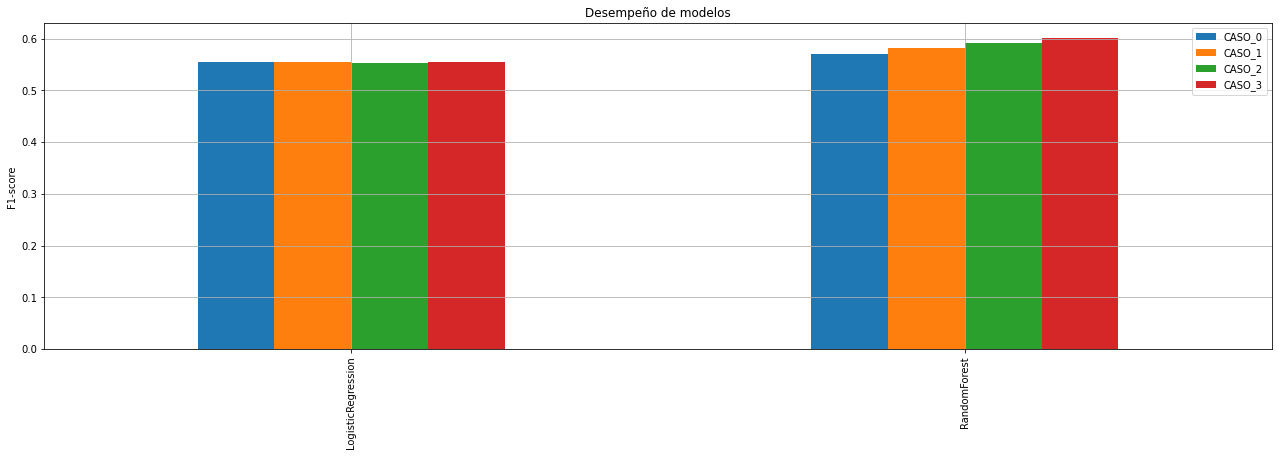

In [169]:
axes = df_results.T.plot.bar(title="Desempeño de modelos", figsize=(22,6))
axes.grid('both')
axes.set_ylabel('F1-score')

* Se obtienen desempeños cercanos en los 3 modelos
* El que posee el mejor desempeño fue RandomForest con el caso 3
Caso 3 utiliza como features:

In [170]:
['Location_le', 'Date_daysOfYear', 'WindGustDir_le', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Pressure9am', 'Rainfall']

['Location_le',
 'Date_daysOfYear',
 'WindGustDir_le',
 'WindGustSpeed',
 'Humidity3pm',
 'Temp3pm',
 'Pressure9am',
 'Rainfall']

Junto con el procesamiento:

In [124]:
## Imputación
# 'WindGustDir': imputación por moda
# 'WindGustSpeed': imputación por mediana
# 'Pressure9am': imputación por kNN

## Codificacion
# 'Date' day of year
# 'Location': label encoding
# 'WindGustDir': label encoding
# 'RainToday, RainTomorrow': dummy encoding

## Predecir el volúmen de precipitaciones (columna Rainfall del dia siguiente), en función al Rainfall del dia actual

### Obtener 'Rainfall_Tomorrow'

In [175]:
w_df = weather_aus_df.set_index('Date')

In [182]:
w_df['Rainfall_tomorrow'] = np.nan

In [185]:
i=0
for index, row in w_df.iterrows():
    if (i+1) < len(w_df):
        if (index + pd.DateOffset(days=1)) == w_df.iloc[i+1, :].name:
            #rainfall_dict['Rainfall_today'].append(row['Rainfall'])
            #rainfall_dict['Rainfall_tomorrow'].append(w_df.iloc[i+1, :]['Rainfall'])
            w_df.iloc[i, 22] = w_df.iloc[i+1, :]['Rainfall']
    i+=1


In [209]:
w_df =  w_df.dropna(subset=['Rainfall_tomorrow'])
w_df = w_df.reset_index()

In [210]:
w_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_tomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


#### Scatter plot

<AxesSubplot:xlabel='Rainfall', ylabel='Rainfall_tomorrow'>

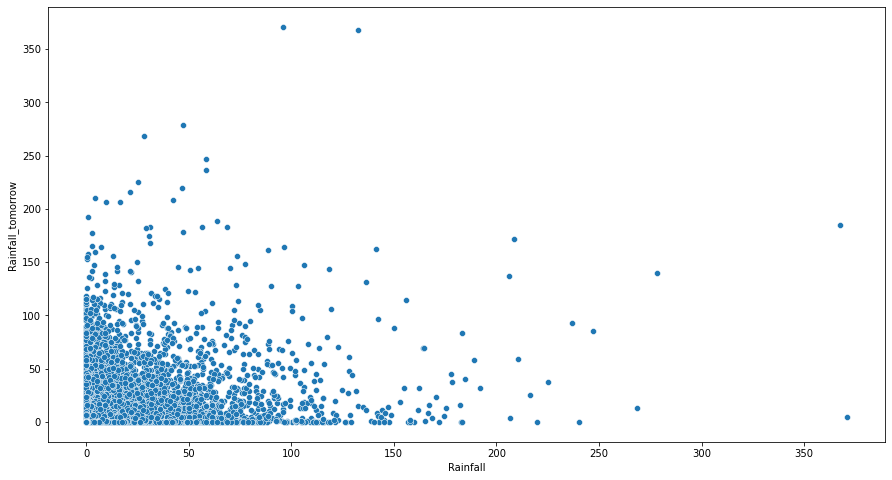

In [222]:
fig,axes = plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(data=w_df, x="Rainfall", y="Rainfall_tomorrow", ax=axes)


In [ ]:
sns.scatterplot(data=w_df, x="Rainfall", y="Rainfall_tomorrow", ax=axes)

### Partición en Train y Test

In [211]:
train_ratio = 0.80
test_ratio = 0.20

X_train, X_test, y_train, y_test = train_test_split(w_df.drop(columns=['Rainfall_tomorrow']), w_df['Rainfall_tomorrow'], test_size=test_ratio)

print("Train: ", X_train.shape,y_train.shape)
print("Test:", X_test.shape,y_test.shape)


Train:  (113613, 23) (113613,)
Test: (28404, 23) (28404,)


In [212]:
# Feature selection

feature_selection = ['Date_daysOfYear_sin', 'WindDir9am_sin', 'WindDir9am_cos', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Pressure9am', 'Rainfall']

XY_train = pre_processing_1(pd.concat([X_train, y_train], axis=1))

X_train = XY_train[feature_selection]
y_train = XY_train[['Rainfall_tomorrow']]

XY_test = pre_processing_1(pd.concat([X_test, y_test], axis=1))

X_test = XY_test[feature_selection]
y_test = XY_test[['Rainfall_tomorrow']]

In [225]:
X_train.head()

,Date_daysOfYear_sin,WindDir9am_sin,WindDir9am_cos,WindGustSpeed,Humidity3pm,Temp3pm,Pressure9am,Rainfall
9365,0.997325,0.707107,-7.071068e-01,39.0,64.0,26.6,1020.400000,0.0
120903,0.377708,0.923880,3.826834e-01,31.0,53.0,17.4,1030.133333,0.0
80169,-0.559589,1.000000,6.123234e-17,54.0,86.0,14.8,1010.500000,6.4
2626,0.440519,-0.707107,7.071068e-01,30.0,92.0,13.5,1015.200000,11.6
115325,0.699458,0.382683,9.238795e-01,43.0,29.0,34.2,1013.000000,0.0


### Standarization


In [217]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train.values)
X_test_scaled = x_scaler.transform(X_test.values)
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy().reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.to_numpy().reshape(-1,1))

### Modelado

In [218]:
class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        return NotImplemented

    def predict(self, X):
        return NotImplemented

class LinearRegressionWithB(BaseModel):

    def fit(self, X, y):
        X_expanded = np.hstack((np.ones((len(X),1)),X))
        W = np.linalg.inv(X_expanded.T.dot(X_expanded)).dot(X_expanded.T).dot(y)
        self.model = W

    def predict(self, X):
        X_expanded = np.hstack((np.ones((len(X),1)),X))
        return X_expanded.dot(self.model)


class LinearRegressionWithGradient(BaseModel):
    """
        :param X: X_train
        :param y: y_train
        :param lr: learning rate
        :param epochs: number of epochs
        :param b: batch size for mini-batch
        :param gradient: type of gradient descent: 'SGD', 'MINI', 'BGD'
    """

    def fit(self, X, y, lr=0.01, epochs=100, b=16, gradient='SGD'):
        X_expanded = np.hstack((np.ones((len(X),1)),X))

        if gradient == 'BGD':
            w = self.gradient_descent(X_expanded, y, lr, epochs)
            self.model = w
            return w
        elif gradient == 'SGD':
            w = self.stochastic_gradient_descent(X_expanded, y, lr, epochs)
            self.model = w
            return w
        elif gradient == 'MINI':
            w = self.mini_batch_gradient_descent(X_expanded, y, lr, epochs, b)
            self.model = w
            return w


    def predict(self, X):
        X_expanded = np.hstack((np.ones((len(X),1)),X))
        return X_expanded.dot(self.model)

    def gradient_descent(self, X, y, lr=0.01, amt_epochs=100):
        """
        shapes:
            X_train = nxm
            y_train = nx1
            W = mx1
        """

        n = X.shape[0]
        m = y.shape[1]

        # initialize random weights
        W = np.random.randn(m).reshape(m, 1)  # mx1

        for i in range(amt_epochs):
            # Calculate the predictions for all samples
            prediction = np.matmul(X, W)  # nx1

            # Calculate the error for all samples
            error = y_train - prediction  # nx1

            # Calculate the gradient for all samples
            grad_sum = np.sum(error * X, axis=0)
            grad_mul = -2 / n * grad_sum  # 1xm
            gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1 (it also works with reshape)

            # Update the parameters
            W = W - (lr * gradient)

        return W

    def stochastic_gradient_descent(self, X, y, lr=0.01, amt_epochs=100):
        """
        shapes:
            X_train = nxm
            y_train = nx1
            W = mx1
        """

        n = X.shape[0]
        m = y.shape[1]

        # initialize random weights
        W = np.random.randn(m).reshape(m, 1)

        # Iterate over the n_epochs
        for i in range(amt_epochs):

            # Shuffle all the samples
            idx = np.random.permutation(X.shape[0])
            X_train = X[idx]
            y_train = y[idx]

            # Iterate over each sample
            for j in range(n):
                # Calculate the prediction for each sample
                prediction = np.matmul(X_train[j].reshape(1, -1), W)  # 1x1
                # Calculate the error for each sample
                error = y_train[j] - prediction  # 1x1
                # Calculate the gradient for each sample
                grad_sum = error * X_train[j]  # 1xm
                grad_mul = -2 / n * grad_sum  # 1xm
                gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1
                # Update all the weights
                W = W - (lr * gradient)  # mx1

        return W

    def mini_batch_gradient_descent(self, X, y, lr=0.01, amt_epochs=100, b=16):
        """
        shapes:
            X_train = nxm
            y_train = nx1
            W = mx1
        """

        n = X.shape[0]
        m = X.shape[1]

        # initialize random weights
        W = np.random.randn(m).reshape(m, 1)

        # iterate over the n_epochs
        for i in range(amt_epochs):

            # Shuffle all the samples
            idx = np.random.permutation(X.shape[0])
            X_train = X[idx]
            y_train = y[idx]

            # Calculate the batch size in samples as a function of the number of batches
            batch_size = int(len(X_train) / b)

            # Iterate over the batches
            for i in range(0, len(X_train), batch_size):
                end = i + batch_size if i + batch_size <= len(X_train) else len(X_train)
                batch_X = X_train[i: end]  # batch_size*m
                batch_y = y_train[i: end]  # batch_size*1

                # Calculate the prediction for the whole batch
                prediction = np.matmul(batch_X, W)  # batch_sizex1
                # Calculate the error for the whole batch
                error = batch_y - prediction  # batch_sizex1

                # Calculate the gradient for the batch

                # error[batch_sizex1]*batch_X[batch_size*m]--> broadcasting --> batch_size*m
                grad_sum = np.sum(error * batch_X, axis=0)  # 1xm
                grad_mul = -2 / batch_size * grad_sum  # 1xm
                gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

                # Update the weights
                W = W - (lr * gradient)

        return W

### Linear Regression (solución cerrada)

In [219]:
mse = MSE()
lineal_reg = LinearRegressionWithB()

# train
lineal_reg.fit(X_train_scaled, y_train_scaled)

# test
y_test_predict = lineal_reg.predict(X_test_scaled)
lr_mse = mse(y_test_scaled, y_test_predict)

print('W: {}'. format(lineal_reg.model.ravel()))
print('MSE: {} '.format(lr_mse))
print('R2-score: {}'.format(r2_score(y_test_scaled, y_test_predict)))

W: [-2.71809485e-16  3.81960940e-03  2.34304463e-02  5.35183486e-02
  1.21860268e-01  3.28341034e-01  1.01944420e-01 -3.82178120e-02
  2.13854135e-01]
MSE: 0.7934032795685714 
R2-score: 0.19639615118688147


Text(0, 0.5, 'Rainfall_tomorrow')

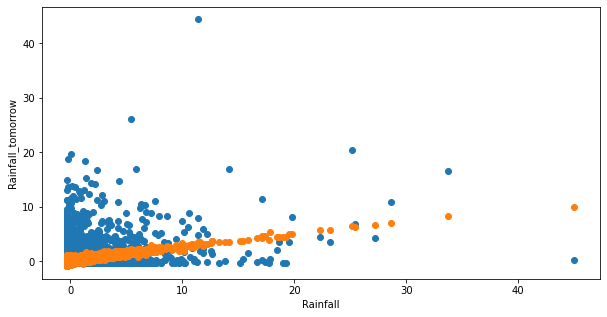

In [227]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
axes.scatter(X_test_scaled[:,-1], y_test_scaled )
axes.scatter(X_test_scaled[:,-1], y_test_predict)
axes.set_xlabel('Rainfall')
axes.set_ylabel('Rainfall_tomorrow')

### Linear Regression con Mini-Batch Gradient Descent

In [228]:
def k_folds_lineal_regression(X, y, lr, b, epochs):
    mse_list = []
    linealreg = LinearRegressionWithGradient()
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(X, y):
        #scale
        # input already scaled

        #fit
        linealreg.fit(X=X[train_index], y=y[train_index], lr=lr, epochs=epochs, b=b, gradient='MINI')

        # metric
        y_val_predict = linealreg.predict(X[test_index])
        mse = MSE()
        mse_list.append(mse(y[test_index].ravel(), y_val_predict.ravel()))

    return np.mean(mse_list)

In [229]:
# seleccion de hiperparametros
param_grid = {'lr': [0.01, 0.05, 0.1], 'epochs': [100, 200], 'batch_size': [32, 64]}
grid = ParameterGrid(param_grid)

kfolds_list = np.zeros(len(list(grid)))
for i, params in enumerate(grid):
    kfolds_list[i] = k_folds_lineal_regression(X_train_scaled, y_train_scaled, params['lr'], params['batch_size'], params['epochs'])

best_params = grid[np.argmin(kfolds_list)]
best_params

{'lr': 0.01, 'epochs': 200, 'batch_size': 32}

In [230]:
print({'lr': 0.01, 'epochs': 200, 'batch_size': 32})

{'lr': 0.01, 'epochs': 200, 'batch_size': 32}


In [232]:
mse = MSE()
lineal_reg = LinearRegressionWithGradient()

# train
lineal_reg.fit(X_train_scaled, y_train_scaled, lr=0.01, epochs=200, b=32, gradient='MINI')

# test
y_test_predict = lineal_reg.predict(X_test_scaled)
lr_mse = mse(y_test_scaled, y_test_predict)

print('W: {}'. format(lineal_reg.model.ravel()))
print('MSE: {} '.format(lr_mse))
print('R2-score: {}'.format(r2_score(y_test_scaled, y_test_predict)))

W: [ 1.35867654e-04  3.60811508e-03  2.38144737e-02  5.36494037e-02
  1.21946697e-01  3.28112093e-01  1.02178652e-01 -3.81584937e-02
  2.13980122e-01]
MSE: 0.793395175971461 
R2-score: 0.1964043589697264


### Linear Regression con sklearn

In [233]:
reg = LinearRegression()

# train
reg.fit(X_train_scaled, y_train_scaled)

# test
y_test_predict = reg.predict(X_test_scaled)
lr_mse = mse(y_test_scaled, y_test_predict)

print('W: {} {}'. format(reg.intercept_, reg.coef_))
print('MSE: {} '.format(lr_mse))
print('R2-score: {}'.format(r2_score(y_test_scaled, y_test_predict)))


W: [-2.28960446e-16] [[ 0.00381961  0.02343045  0.05351835  0.12186027  0.32834103  0.10194442
  -0.03821781  0.21385413]]
MSE: 0.7934032795685714 
R2-score: 0.19639615118688147


In [234]:
lr_mse = 0.7934032795685714
lr_mse

0.7934032795685714

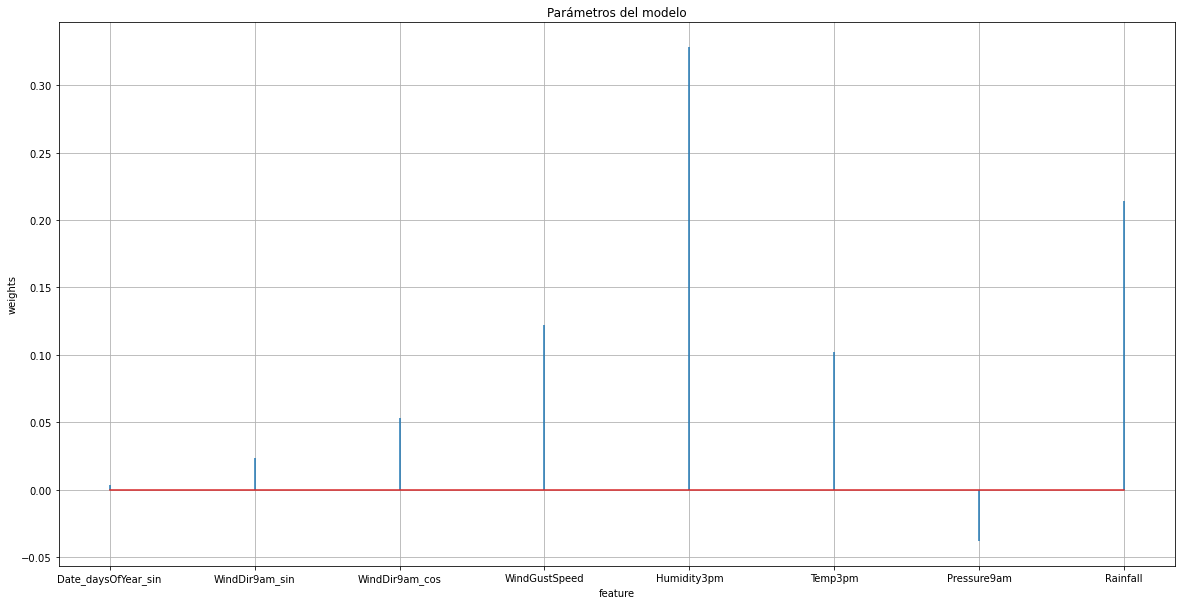

In [236]:
fig, axes = plt.subplots(figsize=(20, 10))
axes.stem(feature_selection, reg.coef_.ravel(), markerfmt=' ')
axes.set_xlabel('feature')
axes.set_ylabel('weights')
axes.set_title('Parámetros del modelo')
axes.grid('both')

### Ridge

In [245]:

ridge_reg = RidgeCV(
    alphas          = np.logspace(10, 2, 300),
    fit_intercept   = True,
    store_cv_values = True
)

_ = ridge_reg.fit(X = X_train_scaled, y = y_train_scaled)

In [246]:
# Evolución de los parámetros en función de alpha
alphas = ridge_reg.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train_scaled, y_train_scaled)
    coefs.append(modelo_temp.coef_.flatten())


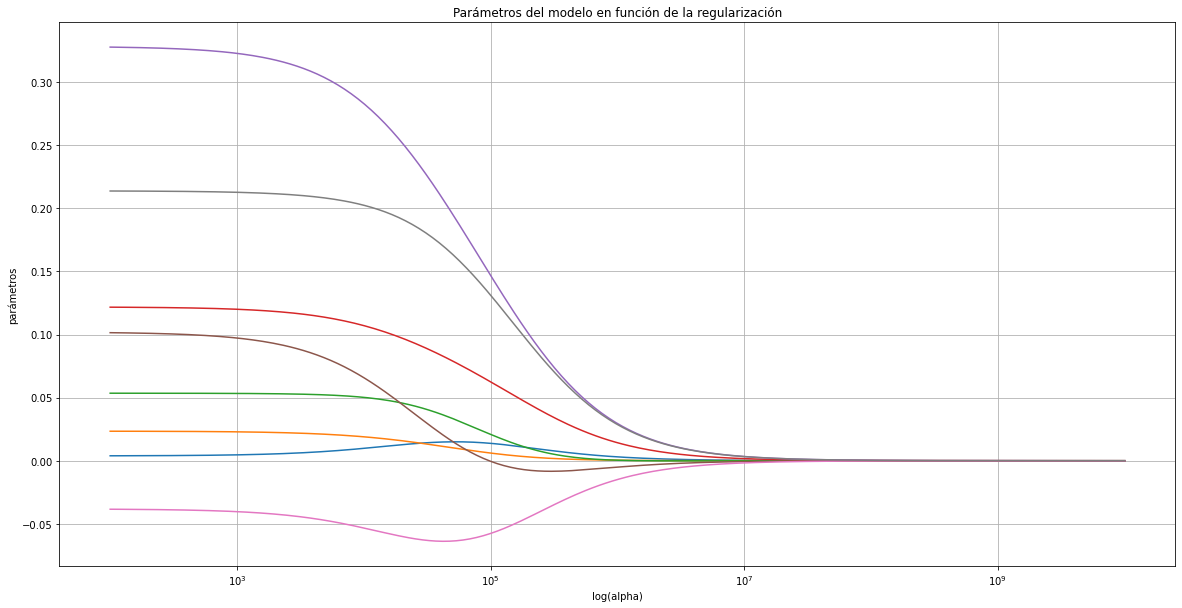

In [247]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
ax.grid('both')

In [249]:
print(f"Mejor valor de alpha encontrado: {ridge_reg.alpha_}")

Mejor valor de alpha encontrado: 100.0


In [250]:
best_alpha_ridge = 100.0

In [251]:
ridgereg = Ridge(alpha=best_alpha_ridge, fit_intercept=False)
ridgereg.fit(X_train_scaled, y_train_scaled)

y_test_predict = ridgereg.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test_scaled, y_test_predict)

print('W: {} {}'. format(ridgereg.intercept_, ridgereg.coef_))
print('MSE: {} '.format(mean_squared_error(y_test_scaled, y_test_predict)))
print('R2-score: {}'.format(r2_score(y_test_scaled, y_test_predict)))

W: 0.0 [[ 0.00390516  0.02337579  0.05350055  0.12167237  0.32777475  0.10145848
  -0.03844063  0.21374127]]
MSE: 0.7934009115282254 
R2-score: 0.19639854967247528


In [252]:
ridge_mse = 0.7934009115282254

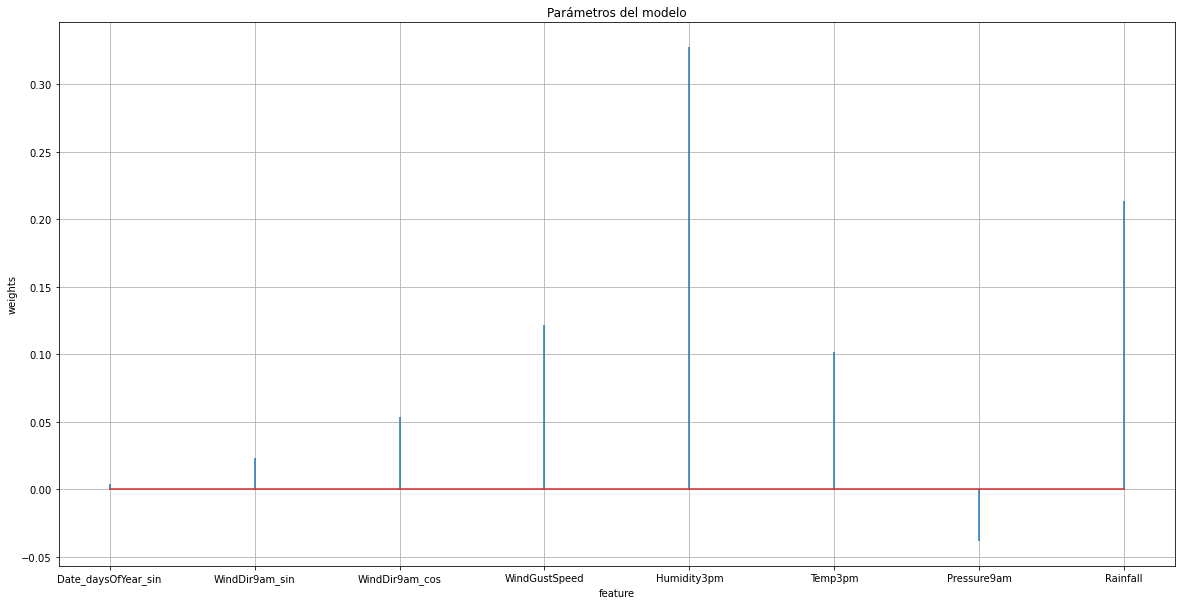

In [253]:
fig, axes = plt.subplots(figsize=(20, 10))
axes.stem(feature_selection, ridgereg.coef_.ravel(), markerfmt=' ')
axes.set_xlabel('feature')
axes.set_ylabel('weights')
axes.set_title('Parámetros del modelo')
axes.grid('both')

### Usando LASSO

In [254]:
lasso_reg = LassoCV(
    alphas          = np.logspace(-10, 3, 200),
    cv              = 5
)

_ = lasso_reg.fit(X = X_train_scaled, y = y_train_scaled)

In [255]:
# Evolución de los parámetros en función de alpha

alphas = lasso_reg.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train_scaled, y_train_scaled)
    coefs.append(modelo_temp.coef_.flatten())

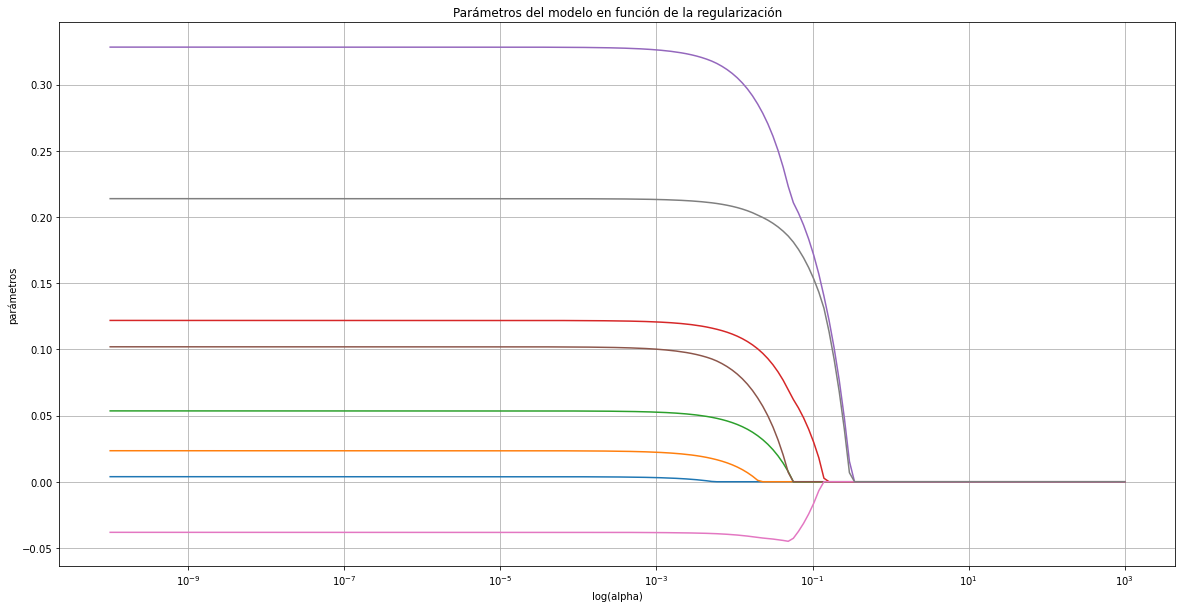

In [256]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
ax.grid('both')

In [257]:
print(f"Mejor valor de alpha encontrado: {lasso_reg.alpha_}")

Mejor valor de alpha encontrado: 1e-10


In [258]:
best_alpha_lasso = 1e-10

In [259]:
lassoreg = Lasso(alpha=best_alpha_lasso, fit_intercept=False)
lassoreg.fit(X_train_scaled, y_train_scaled)

y_test_predict = lassoreg.predict(X_test_scaled)

lasso_mse = mean_squared_error(y_test_scaled, y_test_predict)
print('W: {} {}'. format(lassoreg.intercept_, lassoreg.coef_))
print('MSE: {} '.format(lasso_mse))
print('R2-score: {}'.format(r2_score(y_test_scaled, y_test_predict)))

W: 0.0 [ 0.00381961  0.02343045  0.05351835  0.12186027  0.32834103  0.10194442
 -0.03821781  0.21385413]
MSE: 0.7934032795685886 
R2-score: 0.19639615118686404


In [260]:
lasso_mse = 0.7934032795685886

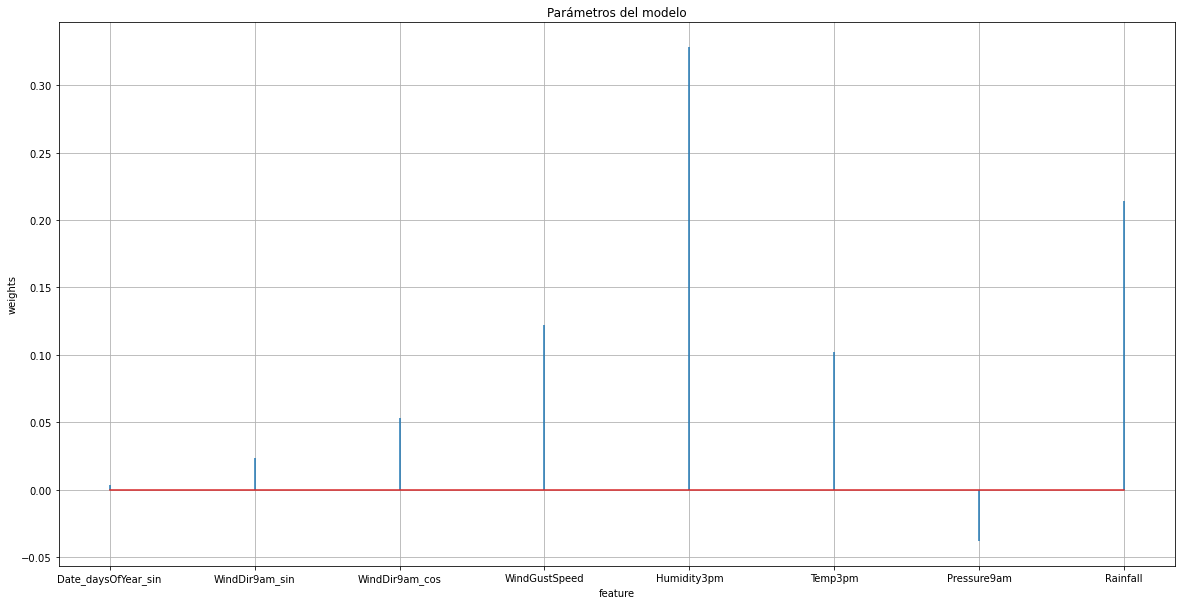

In [261]:
fig, axes = plt.subplots(figsize=(20, 10))
axes.stem(feature_selection, lassoreg.coef_.ravel(), markerfmt=' ')
axes.set_xlabel('feature')
axes.set_ylabel('weights')
axes.set_title('Parámetros del modelo')
axes.grid('both')

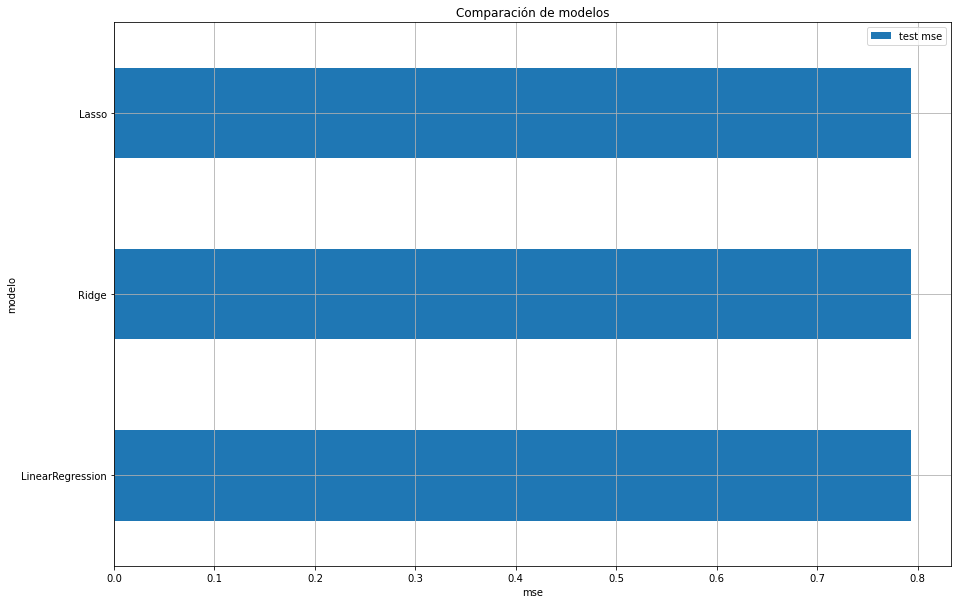

In [265]:
df_comparacion = pd.DataFrame({
    'modelo': ['LinearRegression', 'Ridge', 'Lasso', ],
    'test mse': [lr_mse, ridge_mse, lasso_mse]
})

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('mse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');
ax.grid('both')

* Comparando los resultados, todos los modelos tienen muy similar error cuadrático medio
* No se obtienen buenos resultados debido a que la relacion entre las variables no es lineal.
* Al aplicar las regulaciones Ridge/Lasso no hay ninguna mejora significativa, por lo mismo que la relacion no se puede explicar con una regresión lineal
* Se recomienda usar modelos no lineales o incluir más variables independientes.